# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [5]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
tweets_df = pd.read_csv('./data/tweets_id.txt', sep = '\t')

In [6]:
tweets_df.shape

(627, 4)

In [7]:
tweets_df.head()

,id,full_text,sentiment,emotion
0,1,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,2,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\r\nUribe Velez Alvarito no los deja dormir\r\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,3,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,4,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,negative,joy
4,5,"#OtraPregunta \r\n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\r\nEsto no pinta nada bien... y si además gana Lula en Brasil...\r\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [8]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.668262
neutral     0.275917
positive    0.055821
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [9]:
# Removing  unlabeled tweets
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [10]:
tweets_labeled_df.shape

(627, 4)

In [11]:
tweets_unlabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [12]:
tweets_unlabeled_df.shape

(0, 4)

In [13]:
# Scenario 1: Working with all classes
all_classes_df = tweets_labeled_df

In [14]:
# Scenario 2: Working only with positive and negative classes
# Removing neutral class
removed_neutral_df = tweets_labeled_df.loc[tweets_labeled_df['sentiment'].isin(['positive', 'negative'])]

In [15]:
# Scenario 3: Treating neutral as positive classes
neutral_positive_df = tweets_labeled_df
neutral_positive_df['sentiment'] = neutral_positive_df['sentiment'].replace({'neutral': 'positive'})

## Scenario 1 - Tag correction 0 - Train size 100

In [16]:
# the randomstate number ensures that split are reproducible
X_Sc1_T0_100_train, X_Sc1_T0_100_test, y_Sc1_T0_100_train, y_Sc1_T0_100_test = train_test_split(all_classes_df['full_text'], all_classes_df['sentiment'], train_size = 100, stratify = all_classes_df['sentiment'], random_state = 1)

In [17]:
X_Sc1_T0_100_train.shape

(100,)

In [18]:
pd.Series(y_Sc1_T0_100_train).value_counts(normalize = True)

negative    0.67
positive    0.33
Name: sentiment, dtype: float64

In [19]:
X_Sc1_T0_100_test.shape

(527,)

In [20]:
pd.Series(y_Sc1_T0_100_test).value_counts(normalize = True)

negative    0.667932
positive    0.332068
Name: sentiment, dtype: float64

In [21]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [22]:
X_Sc1_T0_100_tfidf = tfidf.fit_transform(X_Sc1_T0_100_train)

### Scenario 1 - Tag correction 0 - Train size 100 - Random Forest Classifier

In [23]:
# Scenario 1 - Tag correction 0 - Train size 100 - Random Forest Classifier
X_Sc1_T0_100_tfidf_Ran_model = RandomForestClassifier()

In [24]:
X_Sc1_T0_100_tfidf_Ran_model.fit(X_Sc1_T0_100_tfidf, y_Sc1_T0_100_train)

RandomForestClassifier()

In [25]:
# Scenario 1 - Tag correction 0 - Train size 100 - Random Forest Classifier - tfidf
y_Sc1_T0_100_train_tfidf_Ran_predict = X_Sc1_T0_100_tfidf_Ran_model.predict(X_Sc1_T0_100_tfidf)
y_Sc1_T0_100_test_tfidf_Ran_predict = X_Sc1_T0_100_tfidf_Ran_model.predict(tfidf.transform(X_Sc1_T0_100_test))

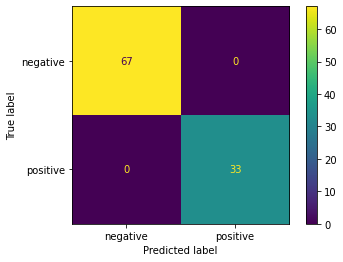

In [26]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T0_100_train, y_Sc1_T0_100_train_tfidf_Ran_predict)

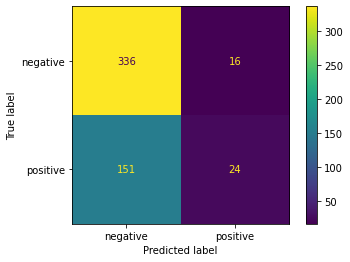

In [27]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Ran_predict)

In [28]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Ran_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Ran_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Ran_predict, pos_label = 'positive'))

Precision: 0.6
Recall: 0.13714285714285715
F1: 0.22325581395348837


In [29]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Ran_predict, average = None))
print('Recall:', recall_score(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Ran_predict, average = None))
print('F1:', f1_score(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Ran_predict, average = None))

Precision: [0.6899384 0.6      ]
Recall: [0.95454545 0.13714286]
F1: [0.80095352 0.22325581]


In [30]:
# Scenario 1 - Tag correction 0 - Train size 100 - Random Forest Classifier - tfidf - Analyzing Errors
Sc1_T0_100_error_tfidf_Ran_df = pd.concat(
    [ pd.concat([X_Sc1_T0_100_test, y_Sc1_T0_100_test], axis = 1).reset_index(),
    pd.Series(y_Sc1_T0_100_test_tfidf_Ran_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc1_T0_100_error_tfidf_Ran_df.drop('index', inplace = True, axis = 1)

In [31]:
Sc1_T0_100_error_tfidf_Ran_df.loc[Sc1_T0_100_error_tfidf_Ran_df['actual'] != Sc1_T0_100_error_tfidf_Ran_df['predicted']].shape

(167, 3)

In [32]:
Sc1_T0_100_error_tfidf_Ran_df.loc[Sc1_T0_100_error_tfidf_Ran_df['actual'] != Sc1_T0_100_error_tfidf_Ran_df['predicted']].to_csv('./data/Sc1_T0_100_error_tfidf_Ran_df.txt', sep ='\t')

In [33]:
Sc1_T0_100_error_tfidf_Ran_df.loc[Sc1_T0_100_error_tfidf_Ran_df['actual'] != Sc1_T0_100_error_tfidf_Ran_df['predicted']].head()

,full_text,actual,predicted
2,#COLOMBIA: Si vas a cubrir las elecciones necesitas un plan de comunicación. \r\n\r\nAlerta rápidamente a los demás si algo te ha sucedido y proporciona toda la información necesaria para poner en marcha una respuesta adecuada. @ACOSalliance \r\n\r\nEncuéntralo aquí: https://t.co/b7OZvGdeDc https://t.co/420CLbD7Ur,positive,negative
3,#Política #Colombia | Uno de los vehículos portaba en su parabrisas un distintivo que lo identificaba como parte de la Alcaldía de Medellín.\r\nhttps://t.co/LDYchqsr08,positive,negative
6,#ColombiaDecide | Petro sobre arremetida de Clan del Golfo: “Quien mataron en Sucre es militante del Pacto Histórico”. \r\n\r\nEl candidato habló al respecto durante acto de campaña en Valledupar https://t.co/o16oE6dF2C,negative,positive
10,¿Qué es la Ley de Garantías y por qué la Corte Constitucional tumbó su reforma?\r\nhttps://t.co/ONIELKP4wg https://t.co/0KuEhWcVlz,positive,negative
14,Luis Pérez se caracteriza por tener un estilo de ropa colorida y a la medida. En este capítulo de #ElHilo le contamos qué comunica con las prendas que usa el candidato.\r\nhttps://t.co/BQkQzsF1Mu\r\n\r\n#Elecciones2022 #ColombiaDecide https://t.co/qSKzzQgQn2,positive,negative


### Scenario 1 - Tag correction 0 - Train size 100 - KNeighbors Classifier

In [34]:
# Scenario 1 - Tag correction 0 - Train size 100 - KNeighbors Classifier
X_Sc1_T0_100_tfidf_Knei_model = KNeighborsClassifier(n_neighbors=3)

In [35]:
X_Sc1_T0_100_tfidf_Knei_model.fit(X_Sc1_T0_100_tfidf, y_Sc1_T0_100_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
# Scenario 1 - Tag correction 0 - Train size 100 - KNeighbors Classifier - tfidf
y_Sc1_T0_100_train_tfidf_Knei_predict = X_Sc1_T0_100_tfidf_Knei_model.predict(X_Sc1_T0_100_tfidf)
y_Sc1_T0_100_test_tfidf_Knei_predict = X_Sc1_T0_100_tfidf_Knei_model.predict(tfidf.transform(X_Sc1_T0_100_test))

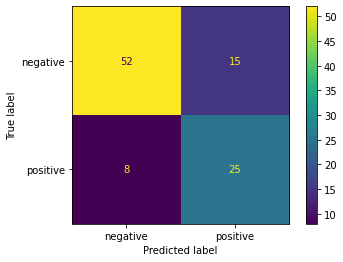

In [37]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T0_100_train, y_Sc1_T0_100_train_tfidf_Knei_predict)

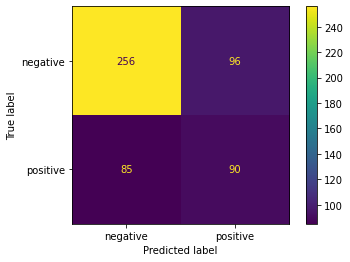

In [38]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Knei_predict)

In [39]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Knei_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Knei_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Knei_predict, pos_label = 'positive'))

Precision: 0.4838709677419355
Recall: 0.5142857142857142
F1: 0.4986149584487534


In [40]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Knei_predict, average = None))
print('Recall:', recall_score(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Knei_predict, average = None))
print('F1:', f1_score(y_Sc1_T0_100_test, y_Sc1_T0_100_test_tfidf_Knei_predict, average = None))

Precision: [0.75073314 0.48387097]
Recall: [0.72727273 0.51428571]
F1: [0.73881674 0.49861496]


In [41]:
# Scenario 1 - Tag correction 0 - Train size 100 - KNeighbors Classifier - tfidf - Analyzing Errors
Sc1_T0_100_error_tfidf_Knei_df = pd.concat(
    [ pd.concat([X_Sc1_T0_100_test, y_Sc1_T0_100_test], axis = 1).reset_index(),
    pd.Series(y_Sc1_T0_100_test_tfidf_Knei_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc1_T0_100_error_tfidf_Knei_df.drop('index', inplace = True, axis = 1)

In [42]:
Sc1_T0_100_error_tfidf_Knei_df.loc[Sc1_T0_100_error_tfidf_Knei_df['actual'] != Sc1_T0_100_error_tfidf_Knei_df['predicted']].shape

(181, 3)

In [43]:
Sc1_T0_100_error_tfidf_Knei_df.loc[Sc1_T0_100_error_tfidf_Knei_df['actual'] != Sc1_T0_100_error_tfidf_Knei_df['predicted']].to_csv('./data/Sc1_T0_100_error_tfidf_Knei_df.txt', sep ='\t')

In [44]:
Sc1_T0_100_error_tfidf_Knei_df.loc[Sc1_T0_100_error_tfidf_Knei_df['actual'] != Sc1_T0_100_error_tfidf_Knei_df['predicted']].head()

,full_text,actual,predicted
0,@lcvelez Las elecciones deberían estar suspendidas hasta tanto no nos den garantías con un nuevo registrador. Colombia y aparece Nicaragua o Venezuela forzados a aceptar elecciones chambonas para beneficiar a @petrogustavo,negative,positive
2,#COLOMBIA: Si vas a cubrir las elecciones necesitas un plan de comunicación. \r\n\r\nAlerta rápidamente a los demás si algo te ha sucedido y proporciona toda la información necesaria para poner en marcha una respuesta adecuada. @ACOSalliance \r\n\r\nEncuéntralo aquí: https://t.co/b7OZvGdeDc https://t.co/420CLbD7Ur,positive,negative
5,"@RevistaSemana El tema es que quién lo dice, es el mayor delincuente de la historia de Colombia, ¿Cómo le van a robar elecciones al líder de la corrupción en Colombia?",negative,positive
10,¿Qué es la Ley de Garantías y por qué la Corte Constitucional tumbó su reforma?\r\nhttps://t.co/ONIELKP4wg https://t.co/0KuEhWcVlz,positive,negative
11,Se han robado las elecciones del congreso !! @PGN_COL @CGR_Colombia @DELAESPRIELLAE @FiscaliaCol y no va a pasar nada ???,negative,positive


## Scenario 1 - Tag correction 1 - Train size 100

### Scenario 1 - Tag correction 1 - Train size 100 - Random Forest Classifier

In [45]:
Sc1_T1_100_tfidf_Ran_df = pd.read_csv('./data/Sc1_T1_100_tfidf_Ran_df.txt', sep = '\t')

In [46]:
Sc1_T1_100_tfidf_Ran_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.717703
positive    0.157895
neutral     0.124402
Name: sentiment, dtype: float64

In [47]:
Sc1_T1_100_tfidf_Ran_df.head()

,id,full_text,sentiment,emotion
0,1,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,2,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\r\nUribe Velez Alvarito no los deja dormir\r\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,3,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,4,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,negative,joy
4,5,"#OtraPregunta \r\n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\r\nEsto no pinta nada bien... y si además gana Lula en Brasil...\r\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [48]:
# the randomstate number ensures that split are reproducible
X_Sc1_T1_100_train, X_Sc1_T1_100_test, y_Sc1_T1_100_train, y_Sc1_T1_100_test = train_test_split(Sc1_T1_100_tfidf_Ran_df['full_text'], Sc1_T1_100_tfidf_Ran_df['sentiment'], train_size = 100, stratify = Sc1_T1_100_tfidf_Ran_df['sentiment'], random_state = 1)

In [49]:
X_Sc1_T1_100_train.shape

(100,)

In [50]:
pd.Series(y_Sc1_T1_100_train).value_counts(normalize = True)

negative    0.72
positive    0.16
neutral     0.12
Name: sentiment, dtype: float64

In [51]:
X_Sc1_T1_100_test.shape

(527,)

In [52]:
pd.Series(y_Sc1_T1_100_test).value_counts(normalize = True)

negative    0.717268
positive    0.157495
neutral     0.125237
Name: sentiment, dtype: float64

In [53]:
X_Sc1_T1_100_tfidf = tfidf.fit_transform(X_Sc1_T1_100_train)

In [54]:
# Scenario 1 - Tag correction 1 - Train size 100 - Random Forest Classifier
X_Sc1_T1_100_tfidf_Ran_model = RandomForestClassifier()

In [55]:
X_Sc1_T1_100_tfidf_Ran_model.fit(X_Sc1_T1_100_tfidf, y_Sc1_T1_100_train)

RandomForestClassifier()

In [56]:
# Scenario 1 - Tag correction 0 - Train size 100 - Random Forest Classifier - TF-IDF
y_Sc1_T1_100_train_tfidf_Ran_predict = X_Sc1_T1_100_tfidf_Ran_model.predict(X_Sc1_T1_100_tfidf)
y_Sc1_T1_100_test_tfidf_Ran_predict = X_Sc1_T1_100_tfidf_Ran_model.predict(tfidf.transform(X_Sc1_T1_100_test))

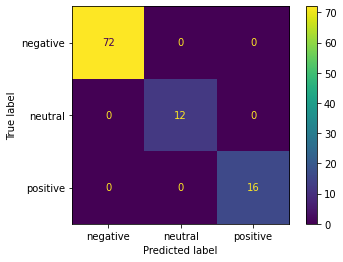

In [57]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T1_100_train, y_Sc1_T1_100_train_tfidf_Ran_predict)

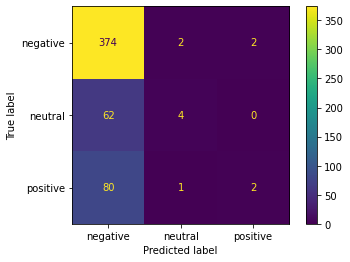

In [58]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Ran_predict)

In [59]:
# Metrics calculation for binary classes
# print('Precision:', precision_score(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Ran_predict, pos_label = 'positive'))
# print('Recall:', recall_score(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Ran_predict, pos_label = 'positive'))
# print('F1:', f1_score(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Ran_predict, pos_label = 'positive'))

In [60]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Ran_predict, average = None))
print('Recall:', recall_score(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Ran_predict, average = None))
print('F1:', f1_score(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Ran_predict, average = None))

Precision: [0.7248062  0.57142857 0.5       ]
Recall: [0.98941799 0.06060606 0.02409639]
F1: [0.83668904 0.10958904 0.04597701]


In [61]:
# Scenario 1 - Tag correction 0 - Train size 100 - Random Forest Classifier - TF-IDF - Analyzing Errors
Sc1_T1_100_error_tfidf_Ran_df = pd.concat(
    [ pd.concat([X_Sc1_T1_100_test, y_Sc1_T1_100_test], axis = 1).reset_index(),
    pd.Series(y_Sc1_T1_100_test_tfidf_Ran_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc1_T1_100_error_tfidf_Ran_df.drop('index', inplace = True, axis = 1)

In [62]:
Sc1_T1_100_error_tfidf_Ran_df.loc[Sc1_T1_100_error_tfidf_Ran_df['actual'] != Sc1_T1_100_error_tfidf_Ran_df['predicted']].shape

(147, 3)

In [63]:
Sc1_T1_100_error_tfidf_Ran_df.loc[Sc1_T1_100_error_tfidf_Ran_df['actual'] != Sc1_T1_100_error_tfidf_Ran_df['predicted']].to_csv('./data/Sc1_T1_100_error_tfidf_Ran_df.txt', sep ='\t')

In [64]:
Sc1_T1_100_error_tfidf_Ran_df.loc[Sc1_T1_100_error_tfidf_Ran_df['actual'] != Sc1_T1_100_error_tfidf_Ran_df['predicted']].head()

,full_text,actual,predicted
13,@jojojorge_ Aquí lo podés encontrar. \r\n\r\nhttps://t.co/GZQIklXmNZ,positive,negative
21,"En los consulados de Colombia en el exterior se adelantan las pruebas de funcionalidad para las elecciones de presidente y vicepresidente de la república. En el país, la Registraduría Nacional alista los simulacros para los comicios del 29 de mayo.\r\n\r\n#GarantesDeLaDemocracia https://t.co/7NOQaPod0z",positive,negative
22,Se iniciaron los simulacros de las elecciones de presidente 2022 https://t.co/07SWb8GAT1 / @Registraduria,positive,negative
30,??ESTE ES EL NÚMERO UNO EN LA @Registraduria CUMPLIENDO\r\nCON LA “MISIÓN” y “VISIÓN”DE\r\nNEGOCIAR RESULTADOS EN LAS\r\nELECCIONES DE COLOMBIA?? https://t.co/dpErXAOzS1 https://t.co/OvRAyhSRG8,neutral,negative
31,Ese Petro me salió como muy tirado al centro para mi gusto. ????????????????????????\r\nhagan su match presidencial Aquí!!!!\r\n\r\nhttps://t.co/ZMNhI0Lvl3 https://t.co/5XSAZbZs92 https://t.co/CRRkJy51fu,positive,negative


### Scenario 1 - Tag correction 1 - Train size 100 - KNeighbors Classifier

In [65]:
Sc1_T1_100_tfidf_Knei_df = pd.read_csv('./data/Sc1_T1_100_tfidf_Knei_df.txt', sep = '\t')

In [66]:
Sc1_T1_100_tfidf_Knei_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.717703
positive    0.157895
neutral     0.124402
Name: sentiment, dtype: float64

In [67]:
Sc1_T1_100_tfidf_Knei_df.head()

,id,full_text,sentiment,emotion
0,1,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,2,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\r\nUribe Velez Alvarito no los deja dormir\r\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,3,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,4,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,negative,joy
4,5,"#OtraPregunta \r\n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\r\nEsto no pinta nada bien... y si además gana Lula en Brasil...\r\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [68]:
# the randomstate number ensures that split are reproducible
X_Sc1_T1_100_train, X_Sc1_T1_100_test, y_Sc1_T1_100_train, y_Sc1_T1_100_test = train_test_split(Sc1_T1_100_tfidf_Knei_df['full_text'], Sc1_T1_100_tfidf_Knei_df['sentiment'], train_size = 100, stratify = Sc1_T1_100_tfidf_Knei_df['sentiment'], random_state = 1)

In [69]:
X_Sc1_T1_100_train.shape

(100,)

In [70]:
pd.Series(y_Sc1_T1_100_train).value_counts(normalize = True)

negative    0.72
positive    0.16
neutral     0.12
Name: sentiment, dtype: float64

In [71]:
X_Sc1_T1_100_test.shape

(527,)

In [72]:
pd.Series(y_Sc1_T1_100_test).value_counts(normalize = True)

negative    0.717268
positive    0.157495
neutral     0.125237
Name: sentiment, dtype: float64

In [73]:
X_Sc1_T1_100_tfidf = tfidf.fit_transform(X_Sc1_T1_100_train)

In [74]:
# Scenario 1 - Tag correction 1 - Train size 100 - KNeighbors Classifier
X_Sc1_T1_100_tfidf_Knei_model = KNeighborsClassifier(n_neighbors=3)

In [75]:
X_Sc1_T1_100_tfidf_Knei_model.fit(X_Sc1_T1_100_tfidf, y_Sc1_T1_100_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
# Scenario 1 - Tag correction 1 - Train size 100 - KNeighbors Classifier - TF-IDF
y_Sc1_T1_100_train_tfidf_Knei_predict = X_Sc1_T1_100_tfidf_Knei_model.predict(X_Sc1_T1_100_tfidf)
y_Sc1_T1_100_test_tfidf_Knei_predict = X_Sc1_T1_100_tfidf_Knei_model.predict(tfidf.transform(X_Sc1_T1_100_test))

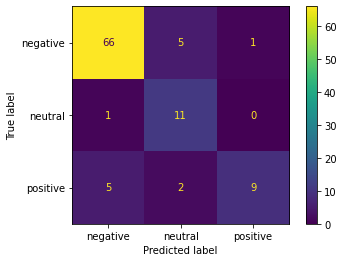

In [77]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T1_100_train, y_Sc1_T1_100_train_tfidf_Knei_predict)

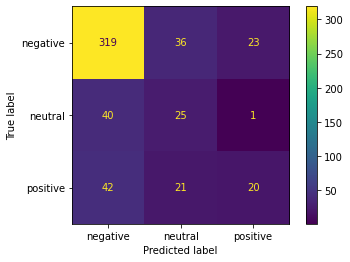

In [78]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Knei_predict)

In [79]:
# Metrics calculation for binary classes
# print('Precision:', precision_score(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Knei_predict, pos_label = 'positive'))
# print('Recall:', recall_score(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Knei_predict, pos_label = 'positive'))
# print('F1:', f1_score(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Knei_predict, pos_label = 'positive'))

In [80]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Knei_predict, average = None))
print('Recall:', recall_score(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Knei_predict, average = None))
print('F1:', f1_score(y_Sc1_T1_100_test, y_Sc1_T1_100_test_tfidf_Knei_predict, average = None))

Precision: [0.79551122 0.30487805 0.45454545]
Recall: [0.84391534 0.37878788 0.24096386]
F1: [0.81899872 0.33783784 0.31496063]


In [81]:
# Scenario 1 - Tag correction 1 - Train size 100 - KNeighbors Classifier - TF-IDF - Analyzing Errors
Sc1_T1_100_error_tfidf_Knei_df = pd.concat(
    [ pd.concat([X_Sc1_T1_100_test, y_Sc1_T1_100_test], axis = 1).reset_index(),
    pd.Series(y_Sc1_T1_100_test_tfidf_Knei_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc1_T1_100_error_tfidf_Knei_df.drop('index', inplace = True, axis = 1)

In [82]:
Sc1_T1_100_error_tfidf_Knei_df.loc[Sc1_T1_100_error_tfidf_Knei_df['actual'] != Sc1_T1_100_error_tfidf_Knei_df['predicted']].shape

(163, 3)

In [83]:
Sc1_T1_100_error_tfidf_Knei_df.loc[Sc1_T1_100_error_tfidf_Knei_df['actual'] != Sc1_T1_100_error_tfidf_Knei_df['predicted']].to_csv('./data/Sc1_T1_100_error_tfidf_Knei_df.txt', sep ='\t')

In [84]:
Sc1_T1_100_error_tfidf_Knei_df.loc[Sc1_T1_100_error_tfidf_Knei_df['actual'] != Sc1_T1_100_error_tfidf_Knei_df['predicted']].head()

,full_text,actual,predicted
1,ESTO ES LO QUE LE ESPERA A COLOMBIA ???? SI PETRO GANA LAS ELECCIONES SU PROPIEDAD Y LA DE TODOS LOS COLOMBIANOS SERÁN QUEMADOS SUS PROPIEDADES EXPROPIADAS OJO COLOMBIA ???? https://t.co/FwhicXJj3D,negative,neutral
2,"Así reaccionaron algunos candidatos al alza de la #inflación Variación anual del IPC llegó a 9,23% en abril, informó el @DANE_Colombia . Esto dijeron los aspirantes a la Presidencia sobre el dato, el más alto en 21 años. https://t.co/KkxlGRIPCi via @Portafolioco",negative,positive
3,#ColombiaDecide | Federico Gutiérrez desde Riohacha: Hay quienes “negocian con corruptos en las cárceles”\r\n\r\nhttps://t.co/IM628eMlaR,negative,positive
5,"@tinagus2000 Evidentemente la persecución judicial, la aceleración de cosas, las trabas del @cnegobec para la inscripción , el viaje de la fiscal a Colombia y el papel de otras instituciones influyeron en la victoria de Lasso. Al otro candidato lo desgastaron, mucha antes de las elecciones.",negative,positive
10,@bpmacias @PaulaBayarte @InesAmarelo @JavierCBugarin @carlasamon ???? Un posible atentado contra el candidato Gustavo Petro preocupa a Colombia a tres semanas de las elecciones. ??\r\n\r\nhttps://t.co/u7OwKlgtiA https://t.co/4vI8OFEnwS,negative,neutral


## Scenario 1 - Tag correction 0 - Train size 300

In [85]:
# the randomstate number ensures that split are reproducible
X_Sc1_T0_300_train, X_Sc1_T0_300_test, y_Sc1_T0_300_train, y_Sc1_T0_300_test = train_test_split(all_classes_df['full_text'], all_classes_df['sentiment'], train_size = 300, stratify = all_classes_df['sentiment'], random_state = 1)

In [86]:
X_Sc1_T0_300_train.shape

(300,)

In [87]:
pd.Series(y_Sc1_T0_300_train).value_counts(normalize = True)

negative    0.666667
positive    0.333333
Name: sentiment, dtype: float64

In [88]:
X_Sc1_T0_300_test.shape

(327,)

In [89]:
pd.Series(y_Sc1_T0_300_test).value_counts(normalize = True)

negative    0.669725
positive    0.330275
Name: sentiment, dtype: float64

In [90]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [91]:
X_Sc1_T0_300_tfidf = tfidf.fit_transform(X_Sc1_T0_300_train)

### Scenario 1 - Tag correction 0 - Train size 300 - Random Forest Classifier

In [92]:
# Scenario 1 - Tag correction 0 - Train size 300 - Random Forest Classifier
X_Sc1_T0_300_tfidf_Ran_model = RandomForestClassifier()

In [93]:
X_Sc1_T0_300_tfidf_Ran_model.fit(X_Sc1_T0_300_tfidf, y_Sc1_T0_300_train)

RandomForestClassifier()

In [94]:
# Scenario 1 - Tag correction 0 - Train size 300 - Random Forest Classifier - tfidf
y_Sc1_T0_300_train_tfidf_Ran_predict = X_Sc1_T0_300_tfidf_Ran_model.predict(X_Sc1_T0_300_tfidf)
y_Sc1_T0_300_test_tfidf_Ran_predict = X_Sc1_T0_300_tfidf_Ran_model.predict(tfidf.transform(X_Sc1_T0_300_test))

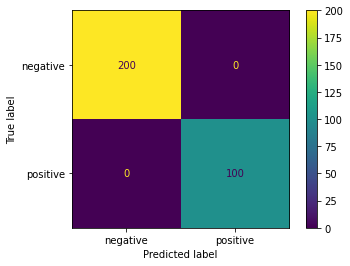

In [95]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T0_300_train, y_Sc1_T0_300_train_tfidf_Ran_predict)

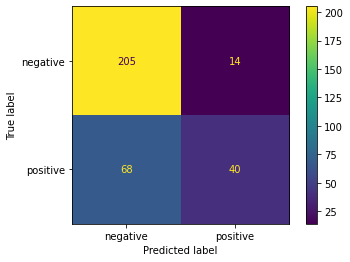

In [96]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Ran_predict)

In [97]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Ran_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Ran_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Ran_predict, pos_label = 'positive'))

Precision: 0.7407407407407407
Recall: 0.37037037037037035
F1: 0.4938271604938271


In [98]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Ran_predict, average = None))
print('Recall:', recall_score(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Ran_predict, average = None))
print('F1:', f1_score(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Ran_predict, average = None))

Precision: [0.75091575 0.74074074]
Recall: [0.93607306 0.37037037]
F1: [0.83333333 0.49382716]


In [99]:
# Scenario 1 - Tag correction 0 - Train size 300 - Random Forest Classifier - tfidf - Analyzing Errors
Sc1_T0_300_error_tfidf_Ran_df = pd.concat(
    [ pd.concat([X_Sc1_T0_300_test, y_Sc1_T0_300_test], axis = 1).reset_index(),
    pd.Series(y_Sc1_T0_300_test_tfidf_Ran_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc1_T0_300_error_tfidf_Ran_df.drop('index', inplace = True, axis = 1)

In [100]:
Sc1_T0_300_error_tfidf_Ran_df.loc[Sc1_T0_300_error_tfidf_Ran_df['actual'] != Sc1_T0_300_error_tfidf_Ran_df['predicted']].shape

(82, 3)

In [101]:
Sc1_T0_300_error_tfidf_Ran_df.loc[Sc1_T0_300_error_tfidf_Ran_df['actual'] != Sc1_T0_300_error_tfidf_Ran_df['predicted']].to_csv('./data/Sc1_T0_300_error_tfidf_Ran_df.txt', sep ='\t')

In [102]:
Sc1_T0_300_error_tfidf_Ran_df.loc[Sc1_T0_300_error_tfidf_Ran_df['actual'] != Sc1_T0_300_error_tfidf_Ran_df['predicted']].head()

,full_text,actual,predicted
2,@ozuismysenpai Pillá https://t.co/fnZFeKA3fz,positive,negative
4,"¿Por qué cree usted que debe ser suspendido Alexander Vega, Registrador Nacional del Estado Civil a 23 días de las elecciones presidenciales en Colombia? Responde el abogado constitucionalista ?? @Germancalderon1 en diálogo con @JeffersonNTN24 Directora @CGurisattiNTN24 ?? https://t.co/HpbMJ16s1T",positive,negative
8,"Con esta ley, que se intentó modificar varias veces en anteriores contiendas, la intención principal era asegurar que las campañas electorales se llevaran a cabo en condiciones igualitarias y transparentes.\r\n\r\n#Elecciones2022 #ColombiaDecide \r\nhttps://t.co/qRNy77hLm6",positive,negative
10,"#6May | El izquierdista Gustavo Petro, uno de los favoritos para las elecciones presidenciales de Colombia que se celebrarán a finales de mes, dijo que de resultar ganador, reanudará las relaciones con Venezuela, rotas desde el 23 de febrero de 2019. https://t.co/kwuU5ZjHa2",negative,positive
14,"LAS FARC se van de frente con #GustavoPetro. \r\nY decían que Juan Manuel Santos no había negociado el país con las FARC. Ahí están, a punto de quedarse con él. Tan linda que es Colombia pero si no la defendemos en estas elecciones la perderemos para siempre. https://t.co/ijkgDmdxiD",positive,negative


### Scenario 1 - Tag correction 0 - Train size 300 - KNeighbors Classifier

In [103]:
# Scenario 1 - Tag correction 0 - Train size 300 - KNeighbors Classifier
X_Sc1_T0_300_tfidf_Knei_model = KNeighborsClassifier(n_neighbors=3)

In [104]:
X_Sc1_T0_300_tfidf_Knei_model.fit(X_Sc1_T0_300_tfidf, y_Sc1_T0_300_train)

KNeighborsClassifier(n_neighbors=3)

In [105]:
# Scenario 1 - Tag correction 0 - Train size 300 - KNeighbors Classifier - tfidf
y_Sc1_T0_300_train_tfidf_Knei_predict = X_Sc1_T0_300_tfidf_Knei_model.predict(X_Sc1_T0_300_tfidf)
y_Sc1_T0_300_test_tfidf_Knei_predict = X_Sc1_T0_300_tfidf_Knei_model.predict(tfidf.transform(X_Sc1_T0_300_test))

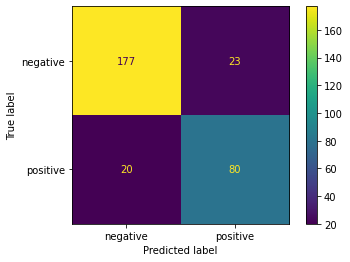

In [106]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T0_300_train, y_Sc1_T0_300_train_tfidf_Knei_predict)

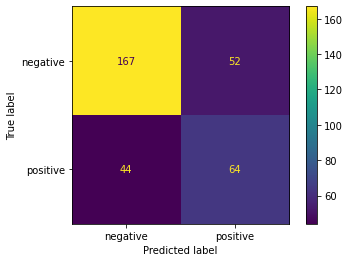

In [107]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Knei_predict)

In [108]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Knei_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Knei_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Knei_predict, pos_label = 'positive'))

Precision: 0.5517241379310345
Recall: 0.5925925925925926
F1: 0.5714285714285714


In [109]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Knei_predict, average = None))
print('Recall:', recall_score(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Knei_predict, average = None))
print('F1:', f1_score(y_Sc1_T0_300_test, y_Sc1_T0_300_test_tfidf_Knei_predict, average = None))

Precision: [0.79146919 0.55172414]
Recall: [0.76255708 0.59259259]
F1: [0.77674419 0.57142857]


In [110]:
# Scenario 1 - Tag correction 0 - Train size 300 - KNeighbors Classifier - tfidf - Analyzing Errors
Sc1_T0_300_error_tfidf_Knei_df = pd.concat(
    [ pd.concat([X_Sc1_T0_300_test, y_Sc1_T0_300_test], axis = 1).reset_index(),
    pd.Series(y_Sc1_T0_300_test_tfidf_Knei_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc1_T0_300_error_tfidf_Knei_df.drop('index', inplace = True, axis = 1)

In [111]:
Sc1_T0_300_error_tfidf_Knei_df.loc[Sc1_T0_300_error_tfidf_Knei_df['actual'] != Sc1_T0_300_error_tfidf_Knei_df['predicted']].shape

(96, 3)

In [112]:
Sc1_T0_300_error_tfidf_Knei_df.loc[Sc1_T0_300_error_tfidf_Knei_df['actual'] != Sc1_T0_300_error_tfidf_Knei_df['predicted']].to_csv('./data/Sc1_T0_300_error_tfidf_Knei_df.txt', sep ='\t')

In [113]:
Sc1_T0_300_error_tfidf_Knei_df.loc[Sc1_T0_300_error_tfidf_Knei_df['actual'] != Sc1_T0_300_error_tfidf_Knei_df['predicted']].head()

,full_text,actual,predicted
2,@ozuismysenpai Pillá https://t.co/fnZFeKA3fz,positive,negative
3,"@MariaFdaCabal Fuera ""Indra"" de Colombia ???? ha participado en el desarrollo de elecciones en Noruega, Francia, Eslovenia, Portugal, Italia, Estados Unidos, Argentina,Bolivia Angola,Argentina, Colombia entre otros, ofreciendo todo tipo de servicios electorales pero a favor de la izquierda ??",negative,positive
6,"@NHolhuin @alezandrazam72 Modelo de Tutela que busca dar ""Tranquilidad"" Para las Elecciones Presidenciales del #29Mayo 2022 en #Colombia \r\nhttps://t.co/DRb5uWlUa3",positive,negative
7,"A caso en Colombia hay Procuraduría? O si existe está sin cabeza? Las elecciones al Congreso fueron un fraude, hay que anularlas y repetirlas; hay que cerrar el CNE y sacar a todos en la Registraduría, la mayoría para una CARCEL https://t.co/wSfZAJfJcX",negative,positive
8,"Con esta ley, que se intentó modificar varias veces en anteriores contiendas, la intención principal era asegurar que las campañas electorales se llevaran a cabo en condiciones igualitarias y transparentes.\r\n\r\n#Elecciones2022 #ColombiaDecide \r\nhttps://t.co/qRNy77hLm6",positive,negative


## Scenario 1 - Tag correction 1 - Train size 300

### Scenario 1 - Tag correction 1 - Train size 300 - Random Forest Classifier

In [114]:
Sc1_T1_300_tfidf_Ran_df = pd.read_csv('./data/Sc1_T1_300_tfidf_Ran_df.txt', sep = '\t')

In [115]:
Sc1_T1_300_tfidf_Ran_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.717703
positive    0.157895
neutral     0.124402
Name: sentiment, dtype: float64

In [116]:
Sc1_T1_300_tfidf_Ran_df.head()

,id,full_text,sentiment,emotion
0,1,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,2,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\r\nUribe Velez Alvarito no los deja dormir\r\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,3,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,4,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,negative,joy
4,5,"#OtraPregunta \r\n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\r\nEsto no pinta nada bien... y si además gana Lula en Brasil...\r\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [117]:
# the randomstate number ensures that split are reproducible
X_Sc1_T1_300_train, X_Sc1_T1_300_test, y_Sc1_T1_300_train, y_Sc1_T1_300_test = train_test_split(Sc1_T1_300_tfidf_Ran_df['full_text'], Sc1_T1_300_tfidf_Ran_df['sentiment'], train_size = 300, stratify = Sc1_T1_300_tfidf_Ran_df['sentiment'], random_state = 1)

In [118]:
X_Sc1_T1_300_train.shape

(300,)

In [119]:
pd.Series(y_Sc1_T1_300_train).value_counts(normalize = True)

negative    0.716667
positive    0.160000
neutral     0.123333
Name: sentiment, dtype: float64

In [120]:
X_Sc1_T1_300_test.shape

(327,)

In [121]:
pd.Series(y_Sc1_T1_300_test).value_counts(normalize = True)

negative    0.718654
positive    0.155963
neutral     0.125382
Name: sentiment, dtype: float64

In [122]:
X_Sc1_T1_300_tfidf = tfidf.fit_transform(X_Sc1_T1_300_train)

In [123]:
# Scenario 1 - Tag correction 0 - Train size 300 - Random Forest Classifier
X_Sc1_T1_300_tfidf_Ran_model = RandomForestClassifier()

In [124]:
X_Sc1_T1_300_tfidf_Ran_model.fit(X_Sc1_T1_300_tfidf, y_Sc1_T1_300_train)

RandomForestClassifier()

In [125]:
# Scenario 1 - Tag correction 0 - Train size 300 - Random Forest Classifier - TF-IDF
y_Sc1_T1_300_train_tfidf_Ran_predict = X_Sc1_T1_300_tfidf_Ran_model.predict(X_Sc1_T1_300_tfidf)
y_Sc1_T1_300_test_tfidf_Ran_predict = X_Sc1_T1_300_tfidf_Ran_model.predict(tfidf.transform(X_Sc1_T1_300_test))

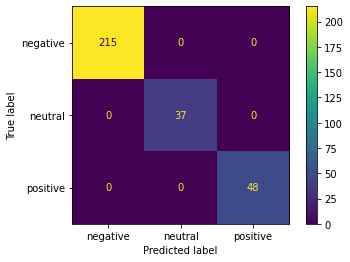

In [126]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T1_300_train, y_Sc1_T1_300_train_tfidf_Ran_predict)

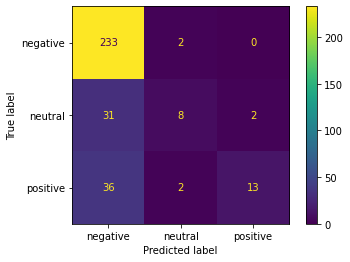

In [127]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Ran_predict)

In [128]:
# Metrics calculation for binary classes
# print('Precision:', precision_score(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Ran_predict, pos_label = 'positive'))
# print('Recall:', recall_score(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Ran_predict, pos_label = 'positive'))
# print('F1:', f1_score(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Ran_predict, pos_label = 'positive'))

In [129]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Ran_predict, average = None))
print('Recall:', recall_score(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Ran_predict, average = None))
print('F1:', f1_score(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Ran_predict, average = None))

Precision: [0.77666667 0.66666667 0.86666667]
Recall: [0.99148936 0.19512195 0.25490196]
F1: [0.87102804 0.30188679 0.39393939]


In [130]:
# Scenario 1 - Tag correction 0 - Train size 300 - Random Forest Classifier - TF-IDF - Analyzing Errors
Sc1_T1_300_error_tfidf_Ran_df = pd.concat(
    [ pd.concat([X_Sc1_T1_300_test, y_Sc1_T1_300_test], axis = 1).reset_index(),
    pd.Series(y_Sc1_T1_300_test_tfidf_Ran_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc1_T1_300_error_tfidf_Ran_df.drop('index', inplace = True, axis = 1)

In [131]:
Sc1_T1_300_error_tfidf_Ran_df.loc[Sc1_T1_300_error_tfidf_Ran_df['actual'] != Sc1_T1_300_error_tfidf_Ran_df['predicted']].shape

(73, 3)

In [132]:
Sc1_T1_300_error_tfidf_Ran_df.loc[Sc1_T1_300_error_tfidf_Ran_df['actual'] != Sc1_T1_300_error_tfidf_Ran_df['predicted']].to_csv('./data/Sc1_T1_300_error_tfidf_Ran_df.txt', sep ='\t')

In [133]:
Sc1_T1_300_error_tfidf_Ran_df.loc[Sc1_T1_300_error_tfidf_Ran_df['actual'] != Sc1_T1_300_error_tfidf_Ran_df['predicted']].head()

,full_text,actual,predicted
3,"El candidato a la Presidencia de Colombia Gustavo Petro, anunció este viernes que retomará las relaciones diplomáticas con Venezuela si gana las elecciones y llega a la jefatura del Estado colombiano.",neutral,negative
8,Petro retomará lazos con Venezuela si llega a Presidencia de Colombia https://t.co/U2HIRmOSsR,neutral,negative
14,"El Tribunal Administrativo de Cundinamarca negó la solicitud de suspensión provisional del Registrador Nacional, Alexander Vega. Sin embargo, decretó unas medidas cautelares para garantizar las elecciones. | A 23 días para la elección presidencial en Colombia, opine. https://t.co/KNA8oitIEa",positive,negative
21,"@lauraro Yo vote por el NO y hoy siento que nos podría pasar lo mismo con las próximas elecciones si no actuamos unidos!!\r\nDejemos el odio irracional, aquí se trata es de salvar el presente y futuro de Colombia!\r\nQuien más se une??",positive,negative
25,#COLOMBIA: Si vas a cubrir las elecciones necesitas un plan de comunicación. \r\n\r\nAlerta rápidamente a los demás si algo te ha sucedido y proporciona toda la información necesaria para poner en marcha una respuesta adecuada. @ACOSalliance \r\n\r\nEncuéntralo aquí: https://t.co/b7OZvGdeDc https://t.co/420CLbD7Ur,positive,negative


### Scenario 1 - Tag correction 1 - Train size 300 - KNeighbors Classifier

In [134]:
Sc1_T1_300_tfidf_Knei_df = pd.read_csv('./data/Sc1_T1_300_tfidf_Knei_df.txt', sep = '\t')

In [135]:
Sc1_T1_300_tfidf_Knei_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.717703
positive    0.157895
neutral     0.124402
Name: sentiment, dtype: float64

In [136]:
Sc1_T1_300_tfidf_Knei_df.head()

,id,full_text,sentiment,emotion
0,1,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,2,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\r\nUribe Velez Alvarito no los deja dormir\r\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,3,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,4,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,negative,joy
4,5,"#OtraPregunta \r\n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\r\nEsto no pinta nada bien... y si además gana Lula en Brasil...\r\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [137]:
# the randomstate number ensures that split are reproducible
X_Sc1_T1_300_train, X_Sc1_T1_300_test, y_Sc1_T1_300_train, y_Sc1_T1_300_test = train_test_split(Sc1_T1_300_tfidf_Knei_df['full_text'], Sc1_T1_300_tfidf_Knei_df['sentiment'], train_size = 300, stratify = Sc1_T1_300_tfidf_Knei_df['sentiment'], random_state = 1)

In [138]:
X_Sc1_T1_300_train.shape

(300,)

In [139]:
pd.Series(y_Sc1_T1_300_train).value_counts(normalize = True)

negative    0.716667
positive    0.160000
neutral     0.123333
Name: sentiment, dtype: float64

In [140]:
X_Sc1_T1_300_test.shape

(327,)

In [141]:
pd.Series(y_Sc1_T1_300_test).value_counts(normalize = True)

negative    0.718654
positive    0.155963
neutral     0.125382
Name: sentiment, dtype: float64

In [142]:
X_Sc1_T1_300_tfidf = tfidf.fit_transform(X_Sc1_T1_300_train)

In [143]:
# Scenario 1 - Tag correction 1 - Train size 300 - KNeighbors Classifier
X_Sc1_T1_300_tfidf_Knei_model = KNeighborsClassifier(n_neighbors=3)

In [144]:
X_Sc1_T1_300_tfidf_Knei_model.fit(X_Sc1_T1_300_tfidf, y_Sc1_T1_300_train)

KNeighborsClassifier(n_neighbors=3)

In [145]:
# Scenario 1 - Tag correction 1 - Train size 300 - KNeighbors Classifier - TF-IDF
y_Sc1_T1_300_train_tfidf_Knei_predict = X_Sc1_T1_300_tfidf_Knei_model.predict(X_Sc1_T1_300_tfidf)
y_Sc1_T1_300_test_tfidf_Knei_predict = X_Sc1_T1_300_tfidf_Knei_model.predict(tfidf.transform(X_Sc1_T1_300_test))

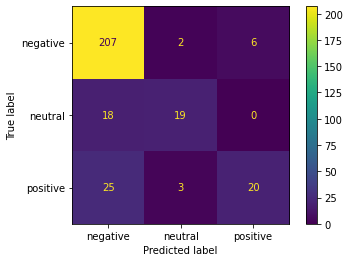

In [146]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T1_300_train, y_Sc1_T1_300_train_tfidf_Knei_predict)

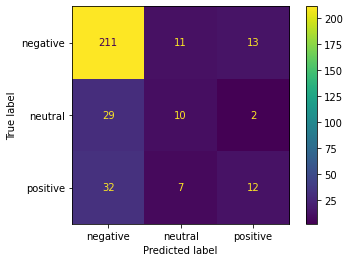

In [147]:
ConfusionMatrixDisplay.from_predictions(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Knei_predict)

In [148]:
# Metrics calculation for binary classes
# print('Precision:', precision_score(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Knei_predict, pos_label = 'positive'))
# print('Recall:', recall_score(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Knei_predict, pos_label = 'positive'))
# print('F1:', f1_score(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Knei_predict, pos_label = 'positive'))

In [149]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Knei_predict, average = None))
print('Recall:', recall_score(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Knei_predict, average = None))
print('F1:', f1_score(y_Sc1_T1_300_test, y_Sc1_T1_300_test_tfidf_Knei_predict, average = None))

Precision: [0.77573529 0.35714286 0.44444444]
Recall: [0.89787234 0.24390244 0.23529412]
F1: [0.83234714 0.28985507 0.30769231]


In [150]:
# Scenario 1 - Tag correction 1 - Train size 300 - KNeighbors Classifier - TF-IDF - Analyzing Errors
Sc1_T1_300_error_tfidf_Knei_df = pd.concat(
    [ pd.concat([X_Sc1_T1_300_test, y_Sc1_T1_300_test], axis = 1).reset_index(),
    pd.Series(y_Sc1_T1_300_test_tfidf_Knei_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc1_T1_300_error_tfidf_Knei_df.drop('index', inplace = True, axis = 1)

In [151]:
Sc1_T1_300_error_tfidf_Knei_df.loc[Sc1_T1_300_error_tfidf_Knei_df['actual'] != Sc1_T1_300_error_tfidf_Knei_df['predicted']].shape

(94, 3)

In [152]:
Sc1_T1_300_error_tfidf_Knei_df.loc[Sc1_T1_300_error_tfidf_Knei_df['actual'] != Sc1_T1_300_error_tfidf_Knei_df['predicted']].to_csv('./data/Sc1_T1_300_error_tfidf_Knei_df.txt', sep ='\t')

In [153]:
Sc1_T1_300_error_tfidf_Knei_df.loc[Sc1_T1_300_error_tfidf_Knei_df['actual'] != Sc1_T1_300_error_tfidf_Knei_df['predicted']].head()

,full_text,actual,predicted
3,"El candidato a la Presidencia de Colombia Gustavo Petro, anunció este viernes que retomará las relaciones diplomáticas con Venezuela si gana las elecciones y llega a la jefatura del Estado colombiano.",neutral,negative
12,"@CNSCColombia @DAFP_COLOMBIA @CRCCol @sgcol @MinTIC_responde @MincienciasCo @INMdeColombia @MinEnergiaCo @ANMColombia @IDEAMColombia @ICACOLOMBIA Estos q controlan procesos de la #CNSC programan pruebas cuando un país está dividido por líderes políticos extremistas en elecciones presidenciales, dónde la fuerzas militares y de policía no son capaces de mantener el orden público, estas pruebas deben ser después del mierdero",negative,positive
14,"El Tribunal Administrativo de Cundinamarca negó la solicitud de suspensión provisional del Registrador Nacional, Alexander Vega. Sin embargo, decretó unas medidas cautelares para garantizar las elecciones. | A 23 días para la elección presidencial en Colombia, opine. https://t.co/KNA8oitIEa",positive,negative
16,“Petro ha hecho oferta de indulto a nombre de los narcos. Tiene que aclarar ese negocio”. Incluso afirma que “el Caballo de Troya del narcotráfico en las elecciones en Colombia es Gustavo Petro y su jinete es Iván Cepeda”\r\n@AndresPastrana_ https://t.co/ypGm6I2Mxt,negative,neutral
21,"@lauraro Yo vote por el NO y hoy siento que nos podría pasar lo mismo con las próximas elecciones si no actuamos unidos!!\r\nDejemos el odio irracional, aquí se trata es de salvar el presente y futuro de Colombia!\r\nQuien más se une??",positive,negative


## Scenario 2 - Tag correction 0 - Train size 100

In [154]:
# the randomstate number ensures that split are reproducible
X_Sc2_T0_100_train, X_Sc2_T0_100_test, y_Sc2_T0_100_train, y_Sc2_T0_100_test = train_test_split(removed_neutral_df['full_text'], removed_neutral_df['sentiment'], train_size = 100, stratify = removed_neutral_df['sentiment'], random_state = 1)

In [155]:
X_Sc2_T0_100_train.shape

(100,)

In [156]:
pd.Series(y_Sc2_T0_100_train).value_counts(normalize = True)

negative    0.92
positive    0.08
Name: sentiment, dtype: float64

In [157]:
X_Sc2_T0_100_test.shape

(354,)

In [158]:
pd.Series(y_Sc2_T0_100_test).value_counts(normalize = True)

negative    0.923729
positive    0.076271
Name: sentiment, dtype: float64

In [159]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [160]:
X_Sc2_T0_100_tfidf = tfidf.fit_transform(X_Sc2_T0_100_train)

### Scenario 2 - Tag correction 0 - Train size 100 - Random Forest Classifier

In [161]:
# Scenario 2 - Tag correction 0 - Train size 100 - Random Forest Classifier
X_Sc2_T0_100_tfidf_Ran_model = RandomForestClassifier()

In [162]:
X_Sc2_T0_100_tfidf_Ran_model.fit(X_Sc2_T0_100_tfidf, y_Sc2_T0_100_train)

RandomForestClassifier()

In [163]:
# Scenario 2 - Tag correction 0 - Train size 100 - Random Forest Classifier - tfidf
y_Sc2_T0_100_train_tfidf_Ran_predict = X_Sc2_T0_100_tfidf_Ran_model.predict(X_Sc2_T0_100_tfidf)
y_Sc2_T0_100_test_tfidf_Ran_predict = X_Sc2_T0_100_tfidf_Ran_model.predict(tfidf.transform(X_Sc2_T0_100_test))

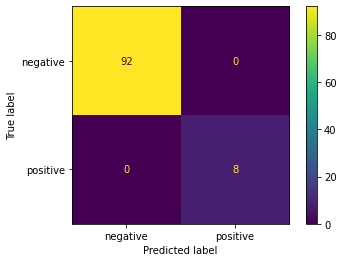

In [164]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T0_100_train, y_Sc2_T0_100_train_tfidf_Ran_predict)

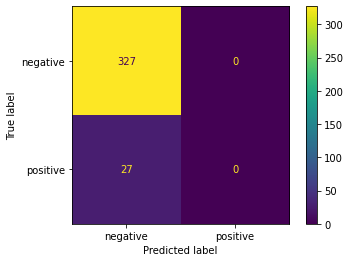

In [165]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Ran_predict)

In [166]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Ran_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Ran_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Ran_predict, pos_label = 'positive'))

Precision: 0.0
Recall: 0.0
F1: 0.0


c:\users\skynet\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Ran_predict, average = None))
print('Recall:', recall_score(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Ran_predict, average = None))
print('F1:', f1_score(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Ran_predict, average = None))

Precision: [0.92372881 0.        ]
Recall: [1. 0.]
F1: [0.96035242 0.        ]


c:\users\skynet\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
# Scenario 2 - Tag correction 0 - Train size 100 - Random Forest Classifier - tfidf - Analyzing Errors
Sc2_T0_100_error_tfidf_Ran_df = pd.concat(
    [ pd.concat([X_Sc2_T0_100_test, y_Sc2_T0_100_test], axis = 1).reset_index(),
    pd.Series(y_Sc2_T0_100_test_tfidf_Ran_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc2_T0_100_error_tfidf_Ran_df.drop('index', inplace = True, axis = 1)

In [169]:
Sc2_T0_100_error_tfidf_Ran_df.loc[Sc2_T0_100_error_tfidf_Ran_df['actual'] != Sc2_T0_100_error_tfidf_Ran_df['predicted']].shape

(27, 3)

In [170]:
Sc2_T0_100_error_tfidf_Ran_df.loc[Sc2_T0_100_error_tfidf_Ran_df['actual'] != Sc2_T0_100_error_tfidf_Ran_df['predicted']].to_csv('./data/Sc2_T0_100_error_tfidf_Ran_df.txt', sep ='\t')

In [171]:
Sc2_T0_100_error_tfidf_Ran_df.loc[Sc2_T0_100_error_tfidf_Ran_df['actual'] != Sc2_T0_100_error_tfidf_Ran_df['predicted']].head()

,full_text,actual,predicted
12,EL órgano de control evaluará los hechos para garantizar la idoneidad de los jurados de votación y lograr unas Elecciones Transparentes.??\r\n\r\nhttps://t.co/jWAc4byuUL,positive,negative
23,En el Encuentro conocimos el Informe de Participación Política de las Mujeres en Elecciones 2022.\r\n\r\nNos complace ver que el @PartidoMIRA sigue siendo un referente de participación política real de la mujer en Colombia ???? @carlos_guevara @Virguez @AnaPaolaAgudelo @aydeelizarazoc https://t.co/5D40b9TSAC,positive,negative
37,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",positive,negative
41,Me late que en estas elecciones las mujeres de Colombia somos las que vamos a poner Presidente ?????? #FicoPresidenteEnPrimeraVuelta https://t.co/Kb5EIULNlJ,positive,negative
80,Hoy amanece colombia secuestrada y sitiada por los amigos de un candidato que lleva las politicas de un expresidente durante los ultimos años y tiene a un pais en jaque!\r\nTenemos la posibilidad de salvar a colombia en estas elecciones 2022.\r\nTenemos el derecho al cambio y a la paz https://t.co/gf6MHsLrkc,positive,negative


### Scenario 2 - Tag correction 0 - Train size 100 - KNeighbors Classifier

In [172]:
# Scenario 2 - Tag correction 0 - Train size 100 - KNeighbors Classifier
X_Sc2_T0_100_tfidf_Knei_model = KNeighborsClassifier(n_neighbors=3)

In [173]:
X_Sc2_T0_100_tfidf_Knei_model.fit(X_Sc2_T0_100_tfidf, y_Sc2_T0_100_train)

KNeighborsClassifier(n_neighbors=3)

In [174]:
# Scenario 2 - Tag correction 0 - Train size 100 - KNeighbors Classifier - tfidf
y_Sc2_T0_100_train_tfidf_Knei_predict = X_Sc2_T0_100_tfidf_Knei_model.predict(X_Sc2_T0_100_tfidf)
y_Sc2_T0_100_test_tfidf_Knei_predict = X_Sc2_T0_100_tfidf_Knei_model.predict(tfidf.transform(X_Sc2_T0_100_test))

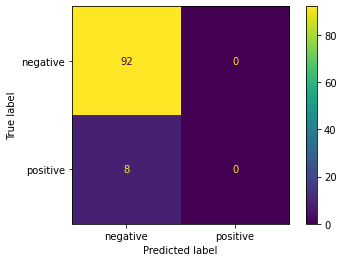

In [175]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T0_100_train, y_Sc2_T0_100_train_tfidf_Knei_predict)

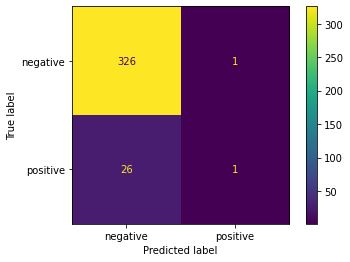

In [176]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Knei_predict)

In [177]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Knei_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Knei_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Knei_predict, pos_label = 'positive'))

Precision: 0.5
Recall: 0.037037037037037035
F1: 0.06896551724137931


In [178]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Knei_predict, average = None))
print('Recall:', recall_score(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Knei_predict, average = None))
print('F1:', f1_score(y_Sc2_T0_100_test, y_Sc2_T0_100_test_tfidf_Knei_predict, average = None))

Precision: [0.92613636 0.5       ]
Recall: [0.9969419  0.03703704]
F1: [0.96023564 0.06896552]


In [179]:
# Scenario 2 - Tag correction 0 - Train size 100 - KNeighbors Classifier - tfidf - Analyzing Errors
Sc2_T0_100_error_tfidf_Knei_df = pd.concat(
    [ pd.concat([X_Sc2_T0_100_test, y_Sc2_T0_100_test], axis = 1).reset_index(),
    pd.Series(y_Sc2_T0_100_test_tfidf_Knei_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc2_T0_100_error_tfidf_Knei_df.drop('index', inplace = True, axis = 1)

In [180]:
Sc2_T0_100_error_tfidf_Knei_df.loc[Sc2_T0_100_error_tfidf_Knei_df['actual'] != Sc2_T0_100_error_tfidf_Knei_df['predicted']].shape

(27, 3)

In [181]:
Sc2_T0_100_error_tfidf_Knei_df.loc[Sc2_T0_100_error_tfidf_Knei_df['actual'] != Sc2_T0_100_error_tfidf_Knei_df['predicted']].to_csv('./data/Sc2_T0_100_error_tfidf_Knei_df.txt', sep ='\t')

In [182]:
Sc2_T0_100_error_tfidf_Knei_df.loc[Sc2_T0_100_error_tfidf_Knei_df['actual'] != Sc2_T0_100_error_tfidf_Knei_df['predicted']].head()

,full_text,actual,predicted
12,EL órgano de control evaluará los hechos para garantizar la idoneidad de los jurados de votación y lograr unas Elecciones Transparentes.??\r\n\r\nhttps://t.co/jWAc4byuUL,positive,negative
23,En el Encuentro conocimos el Informe de Participación Política de las Mujeres en Elecciones 2022.\r\n\r\nNos complace ver que el @PartidoMIRA sigue siendo un referente de participación política real de la mujer en Colombia ???? @carlos_guevara @Virguez @AnaPaolaAgudelo @aydeelizarazoc https://t.co/5D40b9TSAC,positive,negative
37,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",positive,negative
41,Me late que en estas elecciones las mujeres de Colombia somos las que vamos a poner Presidente ?????? #FicoPresidenteEnPrimeraVuelta https://t.co/Kb5EIULNlJ,positive,negative
80,Hoy amanece colombia secuestrada y sitiada por los amigos de un candidato que lleva las politicas de un expresidente durante los ultimos años y tiene a un pais en jaque!\r\nTenemos la posibilidad de salvar a colombia en estas elecciones 2022.\r\nTenemos el derecho al cambio y a la paz https://t.co/gf6MHsLrkc,positive,negative


## Scenario 2 - Tag correction 1 - Train size 100

### Scenario 2 - Tag correction 1 - Train size 100 - Random Forest Classifier

In [183]:
Sc2_T1_100_tfidf_Ran_df = pd.read_csv('./data/Sc2_T1_100_tfidf_Ran_df.txt', sep = '\t')

In [184]:
Sc2_T1_100_tfidf_Ran_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.92511
positive    0.07489
Name: sentiment, dtype: float64

In [185]:
Sc2_T1_100_tfidf_Ran_df.head()

,id,full_text,sentiment,emotion
0,1,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,2,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\r\nUribe Velez Alvarito no los deja dormir\r\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,3,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,4,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,negative,joy
4,5,"#OtraPregunta \r\n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\r\nEsto no pinta nada bien... y si además gana Lula en Brasil...\r\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [186]:
# the randomstate number ensures that split are reproducible
X_Sc2_T1_100_train, X_Sc2_T1_100_test, y_Sc2_T1_100_train, y_Sc2_T1_100_test = train_test_split(Sc2_T1_100_tfidf_Ran_df['full_text'], Sc2_T1_100_tfidf_Ran_df['sentiment'], train_size = 100, stratify = Sc2_T1_100_tfidf_Ran_df['sentiment'], random_state = 1)

In [187]:
X_Sc2_T1_100_train.shape

(100,)

In [188]:
pd.Series(y_Sc2_T1_100_train).value_counts(normalize = True)

negative    0.93
positive    0.07
Name: sentiment, dtype: float64

In [189]:
X_Sc2_T1_100_test.shape

(354,)

In [190]:
pd.Series(y_Sc2_T1_100_test).value_counts(normalize = True)

negative    0.923729
positive    0.076271
Name: sentiment, dtype: float64

In [191]:
X_Sc2_T1_100_tfidf = tfidf.fit_transform(X_Sc2_T1_100_train)

In [192]:
# Scenario 2 - Tag correction 0 - Train size 100 - Random Forest Classifier
X_Sc2_T1_100_tfidf_Ran_model = RandomForestClassifier()

In [193]:
X_Sc2_T1_100_tfidf_Ran_model.fit(X_Sc2_T1_100_tfidf, y_Sc2_T1_100_train)

RandomForestClassifier()

In [194]:
# Scenario 2 - Tag correction 0 - Train size 100 - Random Forest Classifier - TF-IDF
y_Sc2_T1_100_train_tfidf_Ran_predict = X_Sc2_T1_100_tfidf_Ran_model.predict(X_Sc2_T1_100_tfidf)
y_Sc2_T1_100_test_tfidf_Ran_predict = X_Sc2_T1_100_tfidf_Ran_model.predict(tfidf.transform(X_Sc2_T1_100_test))

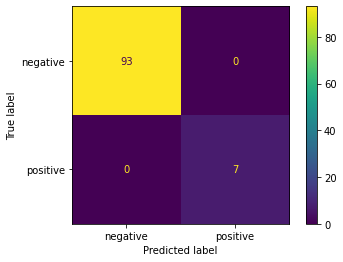

In [195]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T1_100_train, y_Sc2_T1_100_train_tfidf_Ran_predict)

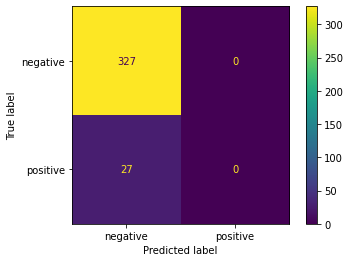

In [196]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Ran_predict)

In [197]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Ran_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Ran_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Ran_predict, pos_label = 'positive'))

Precision: 0.0
Recall: 0.0
F1: 0.0


c:\users\skynet\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Ran_predict, average = None))
print('Recall:', recall_score(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Ran_predict, average = None))
print('F1:', f1_score(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Ran_predict, average = None))

Precision: [0.92372881 0.        ]
Recall: [1. 0.]
F1: [0.96035242 0.        ]


c:\users\skynet\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:
# Scenario 2 - Tag correction 0 - Train size 100 - Random Forest Classifier - TF-IDF - Analyzing Errors
Sc2_T1_100_error_tfidf_Ran_df = pd.concat(
    [ pd.concat([X_Sc2_T1_100_test, y_Sc2_T1_100_test], axis = 1).reset_index(),
    pd.Series(y_Sc2_T1_100_test_tfidf_Ran_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc2_T1_100_error_tfidf_Ran_df.drop('index', inplace = True, axis = 1)

In [200]:
Sc2_T1_100_error_tfidf_Ran_df.loc[Sc2_T1_100_error_tfidf_Ran_df['actual'] != Sc2_T1_100_error_tfidf_Ran_df['predicted']].shape

(27, 3)

In [201]:
Sc2_T1_100_error_tfidf_Ran_df.loc[Sc2_T1_100_error_tfidf_Ran_df['actual'] != Sc2_T1_100_error_tfidf_Ran_df['predicted']].to_csv('./data/Sc2_T1_100_error_tfidf_Ran_df.txt', sep ='\t')

In [202]:
Sc2_T1_100_error_tfidf_Ran_df.loc[Sc2_T1_100_error_tfidf_Ran_df['actual'] != Sc2_T1_100_error_tfidf_Ran_df['predicted']].head()

,full_text,actual,predicted
12,"@montanertwiter Te pido que ores con todo tu corazón por el bien de Colombia, para que no nos caigamos en desgracia en las próximas elecciones. Gracias ????",positive,negative
23,AMÉRICA LATINA\r\nGolpe al uribismo y avance de la izquierda\r\na semanas de las elecciones en Colombia - \r\nhttps://t.co/DsJ3kKO3b6,positive,negative
37,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",positive,negative
41,Mi match electoral no puede ser más cierto ???? @sergio_fajardo ¡vamos con toda! ?? #MatchElectoral \r\n\r\nPara conocer quién sería su match más acorde a sus posturas económicas y sociales para la presidencia: https://t.co/Hb5yhh8elH y mandan fotico a ver que les sale ???? https://t.co/NG4X9fRwCa,positive,negative
80,"@CCSILVA86 @jlreales @Lolita_Celedon @petrogustavo Quien llena, llena antes, durante o despues del festival, eso no es nuevo para la campaña de Petro quien vienes desde las elecciones pasadas llenando plazas en toda Colombia.",positive,negative


### Scenario 2 - Tag correction 1 - Train size 100 - KNeighbors Classifier

In [203]:
Sc2_T1_100_tfidf_Knei_df = pd.read_csv('./data/Sc2_T1_100_tfidf_Knei_df.txt', sep = '\t')

In [204]:
Sc2_T1_100_tfidf_Knei_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.92511
positive    0.07489
Name: sentiment, dtype: float64

In [205]:
Sc2_T1_100_tfidf_Knei_df.head()

,id,full_text,sentiment,emotion
0,1,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,2,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\r\nUribe Velez Alvarito no los deja dormir\r\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,3,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,4,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,negative,joy
4,5,"#OtraPregunta \r\n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\r\nEsto no pinta nada bien... y si además gana Lula en Brasil...\r\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [206]:
# the randomstate number ensures that split are reproducible
X_Sc2_T1_100_train, X_Sc2_T1_100_test, y_Sc2_T1_100_train, y_Sc2_T1_100_test = train_test_split(Sc2_T1_100_tfidf_Knei_df['full_text'], Sc2_T1_100_tfidf_Knei_df['sentiment'], train_size = 100, stratify = Sc2_T1_100_tfidf_Knei_df['sentiment'], random_state = 1)

In [207]:
X_Sc2_T1_100_train.shape

(100,)

In [208]:
pd.Series(y_Sc2_T1_100_train).value_counts(normalize = True)

negative    0.93
positive    0.07
Name: sentiment, dtype: float64

In [209]:
X_Sc2_T1_100_test.shape

(354,)

In [210]:
pd.Series(y_Sc2_T1_100_test).value_counts(normalize = True)

negative    0.923729
positive    0.076271
Name: sentiment, dtype: float64

In [211]:
X_Sc2_T1_100_tfidf = tfidf.fit_transform(X_Sc2_T1_100_train)

In [212]:
# Scenario 2 - Tag correction 1 - Train size 100 - KNeighbors Classifier
X_Sc2_T1_100_tfidf_Knei_model = KNeighborsClassifier(n_neighbors=3)

In [213]:
X_Sc2_T1_100_tfidf_Knei_model.fit(X_Sc2_T1_100_tfidf, y_Sc2_T1_100_train)

KNeighborsClassifier(n_neighbors=3)

In [214]:
# Scenario 2 - Tag correction 1 - Train size 100 - KNeighbors Classifier - TF-IDF
y_Sc2_T1_100_train_tfidf_Knei_predict = X_Sc2_T1_100_tfidf_Knei_model.predict(X_Sc2_T1_100_tfidf)
y_Sc2_T1_100_test_tfidf_Knei_predict = X_Sc2_T1_100_tfidf_Knei_model.predict(tfidf.transform(X_Sc2_T1_100_test))

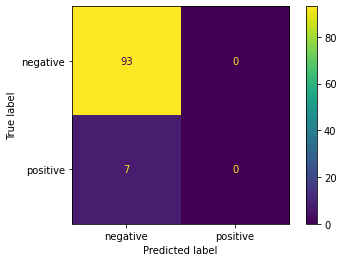

In [215]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T1_100_train, y_Sc2_T1_100_train_tfidf_Knei_predict)

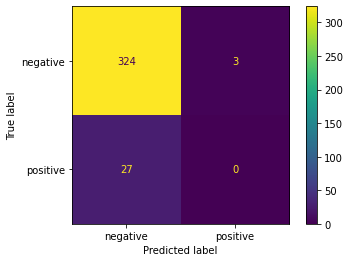

In [216]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Knei_predict)

In [217]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Knei_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Knei_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Knei_predict, pos_label = 'positive'))

Precision: 0.0
Recall: 0.0
F1: 0.0


In [218]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Knei_predict, average = None))
print('Recall:', recall_score(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Knei_predict, average = None))
print('F1:', f1_score(y_Sc2_T1_100_test, y_Sc2_T1_100_test_tfidf_Knei_predict, average = None))

Precision: [0.92307692 0.        ]
Recall: [0.99082569 0.        ]
F1: [0.95575221 0.        ]


In [219]:
# Scenario 2 - Tag correction 1 - Train size 100 - KNeighbors Classifier - TF-IDF - Analyzing Errors
Sc2_T1_100_error_tfidf_Knei_df = pd.concat(
    [ pd.concat([X_Sc2_T1_100_test, y_Sc2_T1_100_test], axis = 1).reset_index(),
    pd.Series(y_Sc2_T1_100_test_tfidf_Knei_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc2_T1_100_error_tfidf_Knei_df.drop('index', inplace = True, axis = 1)

In [220]:
Sc2_T1_100_error_tfidf_Knei_df.loc[Sc2_T1_100_error_tfidf_Knei_df['actual'] != Sc2_T1_100_error_tfidf_Knei_df['predicted']].shape

(30, 3)

In [221]:
Sc2_T1_100_error_tfidf_Knei_df.loc[Sc2_T1_100_error_tfidf_Knei_df['actual'] != Sc2_T1_100_error_tfidf_Knei_df['predicted']].to_csv('./data/Sc2_T1_100_error_tfidf_Knei_df.txt', sep ='\t')

In [222]:
Sc2_T1_100_error_tfidf_Knei_df.loc[Sc2_T1_100_error_tfidf_Knei_df['actual'] != Sc2_T1_100_error_tfidf_Knei_df['predicted']].head()

,full_text,actual,predicted
12,"@montanertwiter Te pido que ores con todo tu corazón por el bien de Colombia, para que no nos caigamos en desgracia en las próximas elecciones. Gracias ????",positive,negative
23,AMÉRICA LATINA\r\nGolpe al uribismo y avance de la izquierda\r\na semanas de las elecciones en Colombia - \r\nhttps://t.co/DsJ3kKO3b6,positive,negative
37,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",positive,negative
41,Mi match electoral no puede ser más cierto ???? @sergio_fajardo ¡vamos con toda! ?? #MatchElectoral \r\n\r\nPara conocer quién sería su match más acorde a sus posturas económicas y sociales para la presidencia: https://t.co/Hb5yhh8elH y mandan fotico a ver que les sale ???? https://t.co/NG4X9fRwCa,positive,negative
68,"@NTN24 se siente el sesgo de parte del CNE,por parte de ese magistrado además dice que está investigando pero están es ganando tiempo a que pasen las elecciones no están pensando para nada en Colombia.",negative,positive


## Scenario 2 - Tag correction 0 - Train size 300

In [223]:
# the randomstate number ensures that split are reproducible
X_Sc2_T0_300_train, X_Sc2_T0_300_test, y_Sc2_T0_300_train, y_Sc2_T0_300_test = train_test_split(removed_neutral_df['full_text'], removed_neutral_df['sentiment'], train_size = 300, stratify = removed_neutral_df['sentiment'], random_state = 1)

In [224]:
X_Sc2_T0_300_train.shape

(300,)

In [225]:
pd.Series(y_Sc2_T0_300_train).value_counts(normalize = True)

negative    0.923333
positive    0.076667
Name: sentiment, dtype: float64

In [226]:
X_Sc2_T0_300_test.shape

(154,)

In [227]:
pd.Series(y_Sc2_T0_300_test).value_counts(normalize = True)

negative    0.922078
positive    0.077922
Name: sentiment, dtype: float64

In [228]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [229]:
X_Sc2_T0_300_tfidf = tfidf.fit_transform(X_Sc2_T0_300_train)

### Scenario 2 - Tag correction 0 - Train size 300 - Random Forest Classifier

In [230]:
# Scenario 2 - Tag correction 0 - Train size 300 - Random Forest Classifier
X_Sc2_T0_300_tfidf_Ran_model = RandomForestClassifier()

In [231]:
X_Sc2_T0_300_tfidf_Ran_model.fit(X_Sc2_T0_300_tfidf, y_Sc2_T0_300_train)

RandomForestClassifier()

In [232]:
# Scenario 2 - Tag correction 0 - Train size 300 - Random Forest Classifier - tfidf
y_Sc2_T0_300_train_tfidf_Ran_predict = X_Sc2_T0_300_tfidf_Ran_model.predict(X_Sc2_T0_300_tfidf)
y_Sc2_T0_300_test_tfidf_Ran_predict = X_Sc2_T0_300_tfidf_Ran_model.predict(tfidf.transform(X_Sc2_T0_300_test))

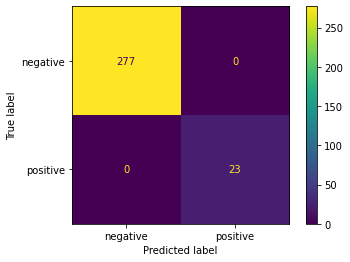

In [233]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T0_300_train, y_Sc2_T0_300_train_tfidf_Ran_predict)

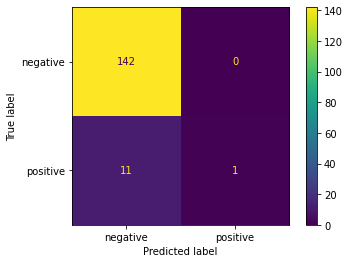

In [234]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Ran_predict)

In [235]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Ran_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Ran_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Ran_predict, pos_label = 'positive'))

Precision: 1.0
Recall: 0.08333333333333333
F1: 0.15384615384615385


In [236]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Ran_predict, average = None))
print('Recall:', recall_score(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Ran_predict, average = None))
print('F1:', f1_score(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Ran_predict, average = None))

Precision: [0.92810458 1.        ]
Recall: [1.         0.08333333]
F1: [0.96271186 0.15384615]


In [237]:
# Scenario 2 - Tag correction 0 - Train size 300 - Random Forest Classifier - tfidf - Analyzing Errors
Sc2_T0_300_error_tfidf_Ran_df = pd.concat(
    [ pd.concat([X_Sc2_T0_300_test, y_Sc2_T0_300_test], axis = 1).reset_index(),
    pd.Series(y_Sc2_T0_300_test_tfidf_Ran_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc2_T0_300_error_tfidf_Ran_df.drop('index', inplace = True, axis = 1)

In [238]:
Sc2_T0_300_error_tfidf_Ran_df.loc[Sc2_T0_300_error_tfidf_Ran_df['actual'] != Sc2_T0_300_error_tfidf_Ran_df['predicted']].shape

(11, 3)

In [239]:
Sc2_T0_300_error_tfidf_Ran_df.loc[Sc2_T0_300_error_tfidf_Ran_df['actual'] != Sc2_T0_300_error_tfidf_Ran_df['predicted']].to_csv('./data/Sc2_T0_300_error_tfidf_Ran_df.txt', sep ='\t')

In [240]:
Sc2_T0_300_error_tfidf_Ran_df.loc[Sc2_T0_300_error_tfidf_Ran_df['actual'] != Sc2_T0_300_error_tfidf_Ran_df['predicted']].head()

,full_text,actual,predicted
0,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",positive,negative
2,@CARLOSFMEJIA @infopresidencia @PGN_COL @FiscaliaCol @CNE_COLOMBIA Así es.\r\nEs lo correcto.\r\nHacer bien las elecciones.\r\nEsa es democracia.,positive,negative
9,"Un abrazo fuerte @CamiloRomero en próximas elecciones espero que mi voto sea por Usted, desde el cielo tu madre iluminará ese camino, y el de Colombia hoy.?? https://t.co/IiVUDKZpb0",positive,negative
14,"Además, los gráficos y mapas electorales demuestran la importancia electoral que tiene el centro del país, ante la densidad poblacional y la tradición de salir a votar. https://t.co/tVxPTMLkC2",positive,negative
104,Juntos lograremos un país de orden y oportunidades para todos????\r\n\r\n #FicoPresidente #MeIdentiFICO #Propuestas #Agro #PlanDeGobierno #Elecciones #Politica #Salud #Libertad #Democracia #Colombia,positive,negative


### Scenario 2 - Tag correction 0 - Train size 300 - KNeighbors Classifier

In [241]:
# Scenario 2 - Tag correction 0 - Train size 300 - KNeighbors Classifier
X_Sc2_T0_300_tfidf_Knei_model = KNeighborsClassifier(n_neighbors=3)

In [242]:
X_Sc2_T0_300_tfidf_Knei_model.fit(X_Sc2_T0_300_tfidf, y_Sc2_T0_300_train)

KNeighborsClassifier(n_neighbors=3)

In [243]:
# Scenario 2 - Tag correction 0 - Train size 300 - KNeighbors Classifier - tfidf
y_Sc2_T0_300_train_tfidf_Knei_predict = X_Sc2_T0_300_tfidf_Knei_model.predict(X_Sc2_T0_300_tfidf)
y_Sc2_T0_300_test_tfidf_Knei_predict = X_Sc2_T0_300_tfidf_Knei_model.predict(tfidf.transform(X_Sc2_T0_300_test))

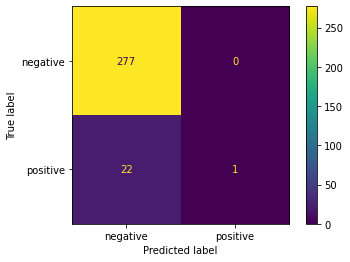

In [244]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T0_300_train, y_Sc2_T0_300_train_tfidf_Knei_predict)

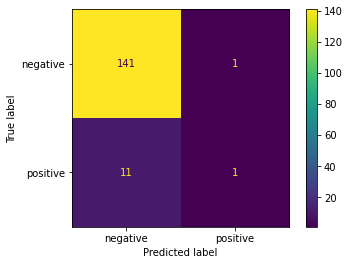

In [245]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Knei_predict)

In [246]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Knei_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Knei_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Knei_predict, pos_label = 'positive'))

Precision: 0.5
Recall: 0.08333333333333333
F1: 0.14285714285714285


In [247]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Knei_predict, average = None))
print('Recall:', recall_score(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Knei_predict, average = None))
print('F1:', f1_score(y_Sc2_T0_300_test, y_Sc2_T0_300_test_tfidf_Knei_predict, average = None))

Precision: [0.92763158 0.5       ]
Recall: [0.99295775 0.08333333]
F1: [0.95918367 0.14285714]


In [248]:
# Scenario 2 - Tag correction 0 - Train size 300 - KNeighbors Classifier - tfidf - Analyzing Errors
Sc2_T0_300_error_tfidf_Knei_df = pd.concat(
    [ pd.concat([X_Sc2_T0_300_test, y_Sc2_T0_300_test], axis = 1).reset_index(),
    pd.Series(y_Sc2_T0_300_test_tfidf_Knei_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc2_T0_300_error_tfidf_Knei_df.drop('index', inplace = True, axis = 1)

In [249]:
Sc2_T0_300_error_tfidf_Knei_df.loc[Sc2_T0_300_error_tfidf_Knei_df['actual'] != Sc2_T0_300_error_tfidf_Knei_df['predicted']].shape

(12, 3)

In [250]:
Sc2_T0_300_error_tfidf_Knei_df.loc[Sc2_T0_300_error_tfidf_Knei_df['actual'] != Sc2_T0_300_error_tfidf_Knei_df['predicted']].to_csv('./data/Sc2_T0_300_error_tfidf_Knei_df.txt', sep ='\t')

In [251]:
Sc2_T0_300_error_tfidf_Knei_df.loc[Sc2_T0_300_error_tfidf_Knei_df['actual'] != Sc2_T0_300_error_tfidf_Knei_df['predicted']].head()

,full_text,actual,predicted
0,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",positive,negative
2,@CARLOSFMEJIA @infopresidencia @PGN_COL @FiscaliaCol @CNE_COLOMBIA Así es.\r\nEs lo correcto.\r\nHacer bien las elecciones.\r\nEsa es democracia.,positive,negative
9,"Un abrazo fuerte @CamiloRomero en próximas elecciones espero que mi voto sea por Usted, desde el cielo tu madre iluminará ese camino, y el de Colombia hoy.?? https://t.co/IiVUDKZpb0",positive,negative
14,"Además, los gráficos y mapas electorales demuestran la importancia electoral que tiene el centro del país, ante la densidad poblacional y la tradición de salir a votar. https://t.co/tVxPTMLkC2",positive,negative
63,"Viví de cerca el CAMBIO de Venezuela.\r\n\r\nFue el pais más rico de América Latina, hoy su economía está destruida.\r\n\r\nA punta de decretos acaban connlas empresas y la que sobrevive la expropian.\r\n\r\nColombia es anticomunista y lo demostraremos en las próximas elecciones.",negative,positive


## Scenario 2 - Tag correction 1 - Train size 300

### Scenario 2 - Tag correction 1 - Train size 300 - Random Forest Classifier

In [252]:
Sc2_T1_300_tfidf_Ran_df = pd.read_csv('./data/Sc2_T1_300_tfidf_Ran_df.txt', sep = '\t')

In [253]:
Sc2_T1_300_tfidf_Ran_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.92511
positive    0.07489
Name: sentiment, dtype: float64

In [254]:
Sc2_T1_300_tfidf_Ran_df.head()

,id,full_text,sentiment,emotion
0,1,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,2,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\r\nUribe Velez Alvarito no los deja dormir\r\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,3,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,4,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,negative,joy
4,5,"#OtraPregunta \r\n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\r\nEsto no pinta nada bien... y si además gana Lula en Brasil...\r\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [255]:
# the randomstate number ensures that split are reproducible
X_Sc2_T1_300_train, X_Sc2_T1_300_test, y_Sc2_T1_300_train, y_Sc2_T1_300_test = train_test_split(Sc2_T1_300_tfidf_Ran_df['full_text'], Sc2_T1_300_tfidf_Ran_df['sentiment'], train_size = 300, stratify = Sc2_T1_300_tfidf_Ran_df['sentiment'], random_state = 1)

In [256]:
X_Sc2_T1_300_train.shape

(300,)

In [257]:
pd.Series(y_Sc2_T1_300_train).value_counts(normalize = True)

negative    0.926667
positive    0.073333
Name: sentiment, dtype: float64

In [258]:
X_Sc2_T1_300_test.shape

(154,)

In [259]:
pd.Series(y_Sc2_T1_300_test).value_counts(normalize = True)

negative    0.922078
positive    0.077922
Name: sentiment, dtype: float64

In [260]:
X_Sc2_T1_300_tfidf = tfidf.fit_transform(X_Sc2_T1_300_train)

In [261]:
# Scenario 2 - Tag correction 0 - Train size 300 - Random Forest Classifier
X_Sc2_T1_300_tfidf_Ran_model = RandomForestClassifier()

In [262]:
X_Sc2_T1_300_tfidf_Ran_model.fit(X_Sc2_T1_300_tfidf, y_Sc2_T1_300_train)

RandomForestClassifier()

In [263]:
# Scenario 2 - Tag correction 0 - Train size 300 - Random Forest Classifier - TF-IDF
y_Sc2_T1_300_train_tfidf_Ran_predict = X_Sc2_T1_300_tfidf_Ran_model.predict(X_Sc2_T1_300_tfidf)
y_Sc2_T1_300_test_tfidf_Ran_predict = X_Sc2_T1_300_tfidf_Ran_model.predict(tfidf.transform(X_Sc2_T1_300_test))

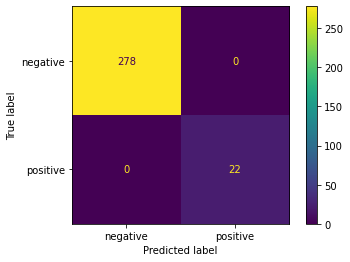

In [264]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T1_300_train, y_Sc2_T1_300_train_tfidf_Ran_predict)

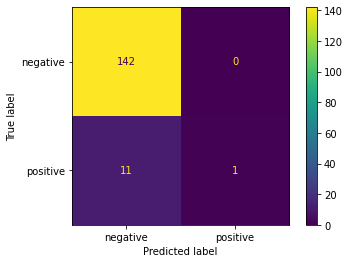

In [265]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Ran_predict)

In [266]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Ran_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Ran_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Ran_predict, pos_label = 'positive'))

Precision: 1.0
Recall: 0.08333333333333333
F1: 0.15384615384615385


In [267]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Ran_predict, average = None))
print('Recall:', recall_score(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Ran_predict, average = None))
print('F1:', f1_score(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Ran_predict, average = None))

Precision: [0.92810458 1.        ]
Recall: [1.         0.08333333]
F1: [0.96271186 0.15384615]


In [268]:
# Scenario 2 - Tag correction 0 - Train size 300 - Random Forest Classifier - TF-IDF - Analyzing Errors
Sc2_T1_300_error_tfidf_Ran_df = pd.concat(
    [ pd.concat([X_Sc2_T1_300_test, y_Sc2_T1_300_test], axis = 1).reset_index(),
    pd.Series(y_Sc2_T1_300_test_tfidf_Ran_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc2_T1_300_error_tfidf_Ran_df.drop('index', inplace = True, axis = 1)

In [269]:
Sc2_T1_300_error_tfidf_Ran_df.loc[Sc2_T1_300_error_tfidf_Ran_df['actual'] != Sc2_T1_300_error_tfidf_Ran_df['predicted']].shape

(11, 3)

In [270]:
Sc2_T1_300_error_tfidf_Ran_df.loc[Sc2_T1_300_error_tfidf_Ran_df['actual'] != Sc2_T1_300_error_tfidf_Ran_df['predicted']].to_csv('./data/Sc2_T1_300_error_tfidf_Ran_df.txt', sep ='\t')

In [271]:
Sc2_T1_300_error_tfidf_Ran_df.loc[Sc2_T1_300_error_tfidf_Ran_df['actual'] != Sc2_T1_300_error_tfidf_Ran_df['predicted']].head()

,full_text,actual,predicted
0,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",positive,negative
2,Y ustedes ¿Ya encontraron su #MatchPresidencial??Lo pueden hacer acá: https://t.co/0E1tZKypTK\r\n\r\n¡Nos gustaría saber quién es su candidato ideal! \r\nLos leemos en los comentarios ?? https://t.co/H11SB9EsBV,positive,negative
9,"Un abrazo fuerte @CamiloRomero en próximas elecciones espero que mi voto sea por Usted, desde el cielo tu madre iluminará ese camino, y el de Colombia hoy.?? https://t.co/IiVUDKZpb0",positive,negative
14,"Además, los gráficos y mapas electorales demuestran la importancia electoral que tiene el centro del país, ante la densidad poblacional y la tradición de salir a votar. https://t.co/tVxPTMLkC2",positive,negative
104,Juntos lograremos un país de orden y oportunidades para todos????\r\n\r\n #FicoPresidente #MeIdentiFICO #Propuestas #Agro #PlanDeGobierno #Elecciones #Politica #Salud #Libertad #Democracia #Colombia,positive,negative


### Scenario 2 - Tag correction 1 - Train size 300 - KNeighbors Classifier

In [272]:
Sc2_T1_300_tfidf_Knei_df = pd.read_csv('./data/Sc2_T1_300_tfidf_Knei_df.txt', sep = '\t')

In [273]:
Sc2_T1_300_tfidf_Knei_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.92511
positive    0.07489
Name: sentiment, dtype: float64

In [274]:
Sc2_T1_300_tfidf_Knei_df.head()

,id,full_text,sentiment,emotion
0,1,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,2,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\r\nUribe Velez Alvarito no los deja dormir\r\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,3,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,4,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,negative,joy
4,5,"#OtraPregunta \r\n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\r\nEsto no pinta nada bien... y si además gana Lula en Brasil...\r\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [275]:
# the randomstate number ensures that split are reproducible
X_Sc2_T1_300_train, X_Sc2_T1_300_test, y_Sc2_T1_300_train, y_Sc2_T1_300_test = train_test_split(Sc2_T1_300_tfidf_Knei_df['full_text'], Sc2_T1_300_tfidf_Knei_df['sentiment'], train_size = 300, stratify = Sc2_T1_300_tfidf_Knei_df['sentiment'], random_state = 1)

In [276]:
X_Sc2_T1_300_train.shape

(300,)

In [277]:
pd.Series(y_Sc2_T1_300_train).value_counts(normalize = True)

negative    0.926667
positive    0.073333
Name: sentiment, dtype: float64

In [278]:
X_Sc2_T1_300_test.shape

(154,)

In [279]:
pd.Series(y_Sc2_T1_300_test).value_counts(normalize = True)

negative    0.922078
positive    0.077922
Name: sentiment, dtype: float64

In [280]:
X_Sc2_T1_300_tfidf = tfidf.fit_transform(X_Sc2_T1_300_train)

In [281]:
# Scenario 2 - Tag correction 1 - Train size 300 - KNeighbors Classifier
X_Sc2_T1_300_tfidf_Knei_model = KNeighborsClassifier(n_neighbors=3)

In [282]:
X_Sc2_T1_300_tfidf_Knei_model.fit(X_Sc2_T1_300_tfidf, y_Sc2_T1_300_train)

KNeighborsClassifier(n_neighbors=3)

In [283]:
# Scenario 2 - Tag correction 1 - Train size 300 - KNeighbors Classifier - TF-IDF
y_Sc2_T1_300_train_tfidf_Knei_predict = X_Sc2_T1_300_tfidf_Knei_model.predict(X_Sc2_T1_300_tfidf)
y_Sc2_T1_300_test_tfidf_Knei_predict = X_Sc2_T1_300_tfidf_Knei_model.predict(tfidf.transform(X_Sc2_T1_300_test))

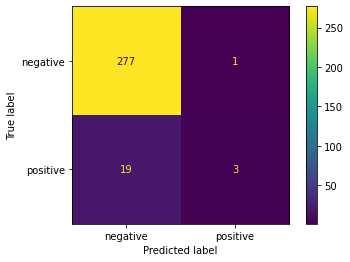

In [284]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T1_300_train, y_Sc2_T1_300_train_tfidf_Knei_predict)

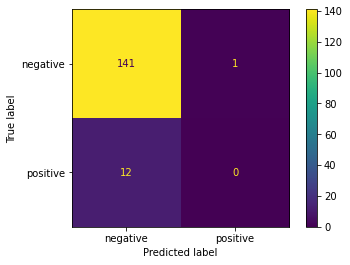

In [285]:
ConfusionMatrixDisplay.from_predictions(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Knei_predict)

In [286]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Knei_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Knei_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Knei_predict, pos_label = 'positive'))

Precision: 0.0
Recall: 0.0
F1: 0.0


In [287]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Knei_predict, average = None))
print('Recall:', recall_score(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Knei_predict, average = None))
print('F1:', f1_score(y_Sc2_T1_300_test, y_Sc2_T1_300_test_tfidf_Knei_predict, average = None))

Precision: [0.92156863 0.        ]
Recall: [0.99295775 0.        ]
F1: [0.9559322 0.       ]


In [288]:
# Scenario 2 - Tag correction 1 - Train size 300 - KNeighbors Classifier - TF-IDF - Analyzing Errors
Sc2_T1_300_error_tfidf_Knei_df = pd.concat(
    [ pd.concat([X_Sc2_T1_300_test, y_Sc2_T1_300_test], axis = 1).reset_index(),
    pd.Series(y_Sc2_T1_300_test_tfidf_Knei_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc2_T1_300_error_tfidf_Knei_df.drop('index', inplace = True, axis = 1)

In [289]:
Sc2_T1_300_error_tfidf_Knei_df.loc[Sc2_T1_300_error_tfidf_Knei_df['actual'] != Sc2_T1_300_error_tfidf_Knei_df['predicted']].shape

(13, 3)

In [290]:
Sc2_T1_300_error_tfidf_Knei_df.loc[Sc2_T1_300_error_tfidf_Knei_df['actual'] != Sc2_T1_300_error_tfidf_Knei_df['predicted']].to_csv('./data/Sc2_T1_300_error_tfidf_Knei_df.txt', sep ='\t')

In [291]:
Sc2_T1_300_error_tfidf_Knei_df.loc[Sc2_T1_300_error_tfidf_Knei_df['actual'] != Sc2_T1_300_error_tfidf_Knei_df['predicted']].head()

,full_text,actual,predicted
0,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",positive,negative
2,Y ustedes ¿Ya encontraron su #MatchPresidencial??Lo pueden hacer acá: https://t.co/0E1tZKypTK\r\n\r\n¡Nos gustaría saber quién es su candidato ideal! \r\nLos leemos en los comentarios ?? https://t.co/H11SB9EsBV,positive,negative
9,"Un abrazo fuerte @CamiloRomero en próximas elecciones espero que mi voto sea por Usted, desde el cielo tu madre iluminará ese camino, y el de Colombia hoy.?? https://t.co/IiVUDKZpb0",positive,negative
14,"Además, los gráficos y mapas electorales demuestran la importancia electoral que tiene el centro del país, ante la densidad poblacional y la tradición de salir a votar. https://t.co/tVxPTMLkC2",positive,negative
26,"@CNSCColombia @DAFP_COLOMBIA @CRCCol @sgcol @MinTIC_responde @MincienciasCo @INMdeColombia @MinEnergiaCo @ANMColombia @IDEAMColombia @ICACOLOMBIA Estos q controlan procesos de la #CNSC programan pruebas cuando un país está dividido por líderes políticos extremistas en elecciones presidenciales, dónde la fuerzas militares y de policía no son capaces de mantener el orden público, estas pruebas deben ser después del mierdero",negative,positive


## Scenario 3 - Tag correction 0 - Train size 100

In [292]:
# the randomstate number ensures that split are reproducible
X_Sc3_T0_100_train, X_Sc3_T0_100_test, y_Sc3_T0_100_train, y_Sc3_T0_100_test = train_test_split(neutral_positive_df['full_text'], neutral_positive_df['sentiment'], train_size = 100, stratify = neutral_positive_df['sentiment'], random_state = 1)

In [293]:
X_Sc3_T0_100_train.shape

(100,)

In [294]:
pd.Series(y_Sc3_T0_100_train).value_counts(normalize = True)

negative    0.67
positive    0.33
Name: sentiment, dtype: float64

In [295]:
X_Sc3_T0_100_test.shape

(527,)

In [296]:
pd.Series(y_Sc3_T0_100_test).value_counts(normalize = True)

negative    0.667932
positive    0.332068
Name: sentiment, dtype: float64

In [297]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [298]:
X_Sc3_T0_100_tfidf = tfidf.fit_transform(X_Sc3_T0_100_train)

### Scenario 3 - Tag correction 0 - Train size 100 - Random Forest Classifier

In [299]:
# Scenario 3 - Tag correction 0 - Train size 100 - Random Forest Classifier
X_Sc3_T0_100_tfidf_Ran_model = RandomForestClassifier()

In [300]:
X_Sc3_T0_100_tfidf_Ran_model.fit(X_Sc3_T0_100_tfidf, y_Sc3_T0_100_train)

RandomForestClassifier()

In [301]:
# Scenario 3 - Tag correction 0 - Train size 100 - Random Forest Classifier - tfidf
y_Sc3_T0_100_train_tfidf_Ran_predict = X_Sc3_T0_100_tfidf_Ran_model.predict(X_Sc3_T0_100_tfidf)
y_Sc3_T0_100_test_tfidf_Ran_predict = X_Sc3_T0_100_tfidf_Ran_model.predict(tfidf.transform(X_Sc3_T0_100_test))

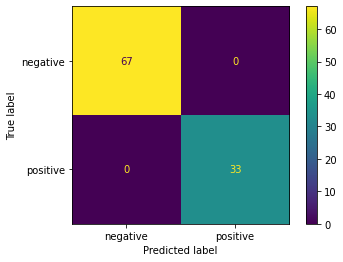

In [302]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T0_100_train, y_Sc3_T0_100_train_tfidf_Ran_predict)

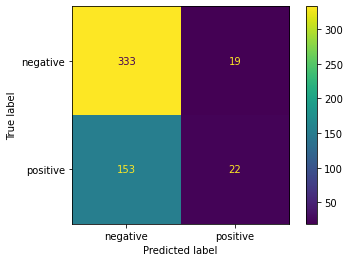

In [303]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Ran_predict)

In [304]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Ran_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Ran_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Ran_predict, pos_label = 'positive'))

Precision: 0.5365853658536586
Recall: 0.12571428571428572
F1: 0.20370370370370375


In [305]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Ran_predict, average = None))
print('Recall:', recall_score(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Ran_predict, average = None))
print('F1:', f1_score(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Ran_predict, average = None))

Precision: [0.68518519 0.53658537]
Recall: [0.94602273 0.12571429]
F1: [0.7947494 0.2037037]


In [306]:
# Scenario 3 - Tag correction 0 - Train size 100 - Random Forest Classifier - tfidf - Analyzing Errors
Sc3_T0_100_error_tfidf_Ran_df = pd.concat(
    [ pd.concat([X_Sc3_T0_100_test, y_Sc3_T0_100_test], axis = 1).reset_index(),
    pd.Series(y_Sc3_T0_100_test_tfidf_Ran_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc3_T0_100_error_tfidf_Ran_df.drop('index', inplace = True, axis = 1)

In [307]:
Sc3_T0_100_error_tfidf_Ran_df.loc[Sc3_T0_100_error_tfidf_Ran_df['actual'] != Sc3_T0_100_error_tfidf_Ran_df['predicted']].shape

(172, 3)

In [308]:
Sc3_T0_100_error_tfidf_Ran_df.loc[Sc3_T0_100_error_tfidf_Ran_df['actual'] != Sc3_T0_100_error_tfidf_Ran_df['predicted']].to_csv('./data/Sc3_T0_100_error_tfidf_Ran_df.txt', sep ='\t')

In [309]:
Sc3_T0_100_error_tfidf_Ran_df.loc[Sc3_T0_100_error_tfidf_Ran_df['actual'] != Sc3_T0_100_error_tfidf_Ran_df['predicted']].head()

,full_text,actual,predicted
0,@lcvelez Las elecciones deberían estar suspendidas hasta tanto no nos den garantías con un nuevo registrador. Colombia y aparece Nicaragua o Venezuela forzados a aceptar elecciones chambonas para beneficiar a @petrogustavo,negative,positive
2,#COLOMBIA: Si vas a cubrir las elecciones necesitas un plan de comunicación. \r\n\r\nAlerta rápidamente a los demás si algo te ha sucedido y proporciona toda la información necesaria para poner en marcha una respuesta adecuada. @ACOSalliance \r\n\r\nEncuéntralo aquí: https://t.co/b7OZvGdeDc https://t.co/420CLbD7Ur,positive,negative
3,#Política #Colombia | Uno de los vehículos portaba en su parabrisas un distintivo que lo identificaba como parte de la Alcaldía de Medellín.\r\nhttps://t.co/LDYchqsr08,positive,negative
10,¿Qué es la Ley de Garantías y por qué la Corte Constitucional tumbó su reforma?\r\nhttps://t.co/ONIELKP4wg https://t.co/0KuEhWcVlz,positive,negative
14,Luis Pérez se caracteriza por tener un estilo de ropa colorida y a la medida. En este capítulo de #ElHilo le contamos qué comunica con las prendas que usa el candidato.\r\nhttps://t.co/BQkQzsF1Mu\r\n\r\n#Elecciones2022 #ColombiaDecide https://t.co/qSKzzQgQn2,positive,negative


### Scenario 3 - Tag correction 0 - Train size 100 - KNeighbors Classifier

In [310]:
# Scenario 3 - Tag correction 0 - Train size 100 - KNeighbors Classifier
X_Sc3_T0_100_tfidf_Knei_model = KNeighborsClassifier(n_neighbors=3)

In [311]:
X_Sc3_T0_100_tfidf_Knei_model.fit(X_Sc3_T0_100_tfidf, y_Sc3_T0_100_train)

KNeighborsClassifier(n_neighbors=3)

In [312]:
# Scenario 3 - Tag correction 0 - Train size 100 - KNeighbors Classifier - tfidf
y_Sc3_T0_100_train_tfidf_Knei_predict = X_Sc3_T0_100_tfidf_Knei_model.predict(X_Sc3_T0_100_tfidf)
y_Sc3_T0_100_test_tfidf_Knei_predict = X_Sc3_T0_100_tfidf_Knei_model.predict(tfidf.transform(X_Sc3_T0_100_test))

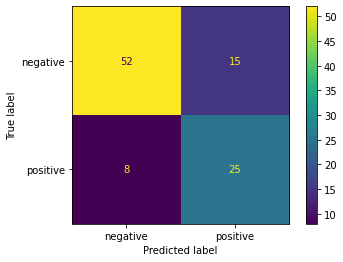

In [313]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T0_100_train, y_Sc3_T0_100_train_tfidf_Knei_predict)

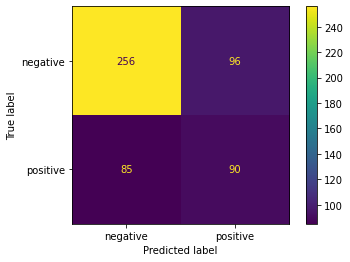

In [314]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Knei_predict)

In [315]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Knei_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Knei_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Knei_predict, pos_label = 'positive'))

Precision: 0.4838709677419355
Recall: 0.5142857142857142
F1: 0.4986149584487534


In [316]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Knei_predict, average = None))
print('Recall:', recall_score(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Knei_predict, average = None))
print('F1:', f1_score(y_Sc3_T0_100_test, y_Sc3_T0_100_test_tfidf_Knei_predict, average = None))

Precision: [0.75073314 0.48387097]
Recall: [0.72727273 0.51428571]
F1: [0.73881674 0.49861496]


In [317]:
# Scenario 3 - Tag correction 0 - Train size 100 - KNeighbors Classifier - tfidf - Analyzing Errors
Sc3_T0_100_error_tfidf_Knei_df = pd.concat(
    [ pd.concat([X_Sc3_T0_100_test, y_Sc3_T0_100_test], axis = 1).reset_index(),
    pd.Series(y_Sc3_T0_100_test_tfidf_Knei_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc3_T0_100_error_tfidf_Knei_df.drop('index', inplace = True, axis = 1)

In [318]:
Sc3_T0_100_error_tfidf_Knei_df.loc[Sc3_T0_100_error_tfidf_Knei_df['actual'] != Sc3_T0_100_error_tfidf_Knei_df['predicted']].shape

(181, 3)

In [319]:
Sc3_T0_100_error_tfidf_Knei_df.loc[Sc3_T0_100_error_tfidf_Knei_df['actual'] != Sc3_T0_100_error_tfidf_Knei_df['predicted']].to_csv('./data/Sc3_T0_100_error_tfidf_Knei_df.txt', sep ='\t')

In [320]:
Sc3_T0_100_error_tfidf_Knei_df.loc[Sc3_T0_100_error_tfidf_Knei_df['actual'] != Sc3_T0_100_error_tfidf_Knei_df['predicted']].head()

,full_text,actual,predicted
0,@lcvelez Las elecciones deberían estar suspendidas hasta tanto no nos den garantías con un nuevo registrador. Colombia y aparece Nicaragua o Venezuela forzados a aceptar elecciones chambonas para beneficiar a @petrogustavo,negative,positive
2,#COLOMBIA: Si vas a cubrir las elecciones necesitas un plan de comunicación. \r\n\r\nAlerta rápidamente a los demás si algo te ha sucedido y proporciona toda la información necesaria para poner en marcha una respuesta adecuada. @ACOSalliance \r\n\r\nEncuéntralo aquí: https://t.co/b7OZvGdeDc https://t.co/420CLbD7Ur,positive,negative
5,"@RevistaSemana El tema es que quién lo dice, es el mayor delincuente de la historia de Colombia, ¿Cómo le van a robar elecciones al líder de la corrupción en Colombia?",negative,positive
10,¿Qué es la Ley de Garantías y por qué la Corte Constitucional tumbó su reforma?\r\nhttps://t.co/ONIELKP4wg https://t.co/0KuEhWcVlz,positive,negative
11,Se han robado las elecciones del congreso !! @PGN_COL @CGR_Colombia @DELAESPRIELLAE @FiscaliaCol y no va a pasar nada ???,negative,positive


## Scenario 3 - Tag correction 1 - Train size 100

### Scenario 3 - Tag correction 1 - Train size 100 - Random Forest Classifier

In [321]:
Sc3_T1_100_tfidf_Ran_df = pd.read_csv('./data/Sc3_T1_100_tfidf_Ran_df.txt', sep = '\t')

In [322]:
Sc3_T1_100_tfidf_Ran_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.681021
positive    0.318979
Name: sentiment, dtype: float64

In [323]:
Sc3_T1_100_tfidf_Ran_df.head()

,id,full_text,sentiment,emotion
0,1,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,2,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\r\nUribe Velez Alvarito no los deja dormir\r\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,3,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,4,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,negative,joy
4,5,"#OtraPregunta \r\n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\r\nEsto no pinta nada bien... y si además gana Lula en Brasil...\r\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [324]:
# the randomstate number ensures that split are reproducible
X_Sc3_T1_100_train, X_Sc3_T1_100_test, y_Sc3_T1_100_train, y_Sc3_T1_100_test = train_test_split(Sc3_T1_100_tfidf_Ran_df['full_text'], Sc3_T1_100_tfidf_Ran_df['sentiment'], train_size = 100, stratify = Sc3_T1_100_tfidf_Ran_df['sentiment'], random_state = 1)

In [325]:
X_Sc3_T1_100_train.shape

(100,)

In [326]:
pd.Series(y_Sc3_T1_100_train).value_counts(normalize = True)

negative    0.68
positive    0.32
Name: sentiment, dtype: float64

In [327]:
X_Sc3_T1_100_test.shape

(527,)

In [328]:
pd.Series(y_Sc3_T1_100_test).value_counts(normalize = True)

negative    0.681214
positive    0.318786
Name: sentiment, dtype: float64

In [329]:
X_Sc3_T1_100_tfidf = tfidf.fit_transform(X_Sc3_T1_100_train)

In [330]:
# Scenario 3 - Tag correction 0 - Train size 100 - Random Forest Classifier
X_Sc3_T1_100_tfidf_Ran_model = RandomForestClassifier()

In [331]:
X_Sc3_T1_100_tfidf_Ran_model.fit(X_Sc3_T1_100_tfidf, y_Sc3_T1_100_train)

RandomForestClassifier()

In [332]:
# Scenario 3 - Tag correction 0 - Train size 100 - Random Forest Classifier - TF-IDF
y_Sc3_T1_100_train_tfidf_Ran_predict = X_Sc3_T1_100_tfidf_Ran_model.predict(X_Sc3_T1_100_tfidf)
y_Sc3_T1_100_test_tfidf_Ran_predict = X_Sc3_T1_100_tfidf_Ran_model.predict(tfidf.transform(X_Sc3_T1_100_test))

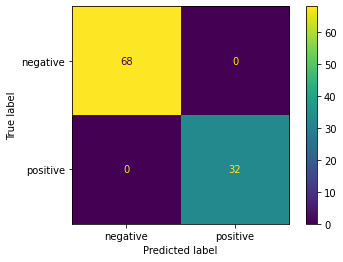

In [333]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T1_100_train, y_Sc3_T1_100_train_tfidf_Ran_predict)

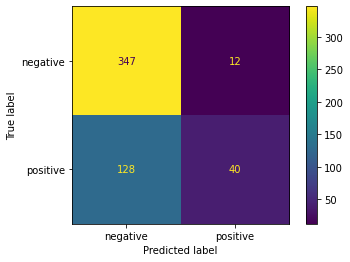

In [334]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Ran_predict)

In [335]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Ran_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Ran_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Ran_predict, pos_label = 'positive'))

Precision: 0.7692307692307693
Recall: 0.23809523809523808
F1: 0.36363636363636365


In [336]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Ran_predict, average = None))
print('Recall:', recall_score(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Ran_predict, average = None))
print('F1:', f1_score(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Ran_predict, average = None))

Precision: [0.73052632 0.76923077]
Recall: [0.96657382 0.23809524]
F1: [0.83213429 0.36363636]


In [337]:
# Scenario 3 - Tag correction 0 - Train size 100 - Random Forest Classifier - TF-IDF - Analyzing Errors
Sc3_T1_100_error_tfidf_Ran_df = pd.concat(
    [ pd.concat([X_Sc3_T1_100_test, y_Sc3_T1_100_test], axis = 1).reset_index(),
    pd.Series(y_Sc3_T1_100_test_tfidf_Ran_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc3_T1_100_error_tfidf_Ran_df.drop('index', inplace = True, axis = 1)

In [338]:
Sc3_T1_100_error_tfidf_Ran_df.loc[Sc3_T1_100_error_tfidf_Ran_df['actual'] != Sc3_T1_100_error_tfidf_Ran_df['predicted']].shape

(140, 3)

In [339]:
Sc3_T1_100_error_tfidf_Ran_df.loc[Sc3_T1_100_error_tfidf_Ran_df['actual'] != Sc3_T1_100_error_tfidf_Ran_df['predicted']].to_csv('./data/Sc3_T1_100_error_tfidf_Ran_df.txt', sep ='\t')

In [340]:
Sc3_T1_100_error_tfidf_Ran_df.loc[Sc3_T1_100_error_tfidf_Ran_df['actual'] != Sc3_T1_100_error_tfidf_Ran_df['predicted']].head()

,full_text,actual,predicted
5,"https://t.co/KXwMVRujE7 recomendado, votemos a conciencia. Este app que saco @elespectador le ayuda a ver como sus posiciones se alinean con su candidato. 1/3 #eleccionescolombia2022 #elecciones #colombia",positive,negative
9,¿Cómo lucían los demás tarjetones? ??¿Cree usted que se evidencia el cambio de un bipartidismo a un sistema de caudillos? https://t.co/7jcyCwQuni,negative,positive
10,¡Viva Petro!\r\nColombia | Petro anuncia que si gana restablecerá las relaciones diplomáticas y consulares con Venezuela @InfoNodal https://t.co/VjYoQsWoY1,positive,negative
16,Eso sabe ;)\r\nAdelante #PetroPresidente2022 \r\nhttps://t.co/xscQ26b62m https://t.co/NIJNT0Sms7,positive,negative
20,@CARLOSFMEJIA @infopresidencia @FiscaliaCol @PGN_COL @CNE_COLOMBIA Deberían hacer traslados de los REGISTRADORES REGIONALES LOCALES . Evitar que se queden en los mismos sitios de las elecciones para congreso y consulta.,positive,negative


### Scenario 3 - Tag correction 1 - Train size 100 - KNeighbors Classifier

In [341]:
Sc3_T1_100_tfidf_Knei_df = pd.read_csv('./data/Sc3_T1_100_tfidf_Knei_df.txt', sep = '\t')

In [342]:
Sc3_T1_100_tfidf_Knei_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.681021
positive    0.318979
Name: sentiment, dtype: float64

In [343]:
Sc3_T1_100_tfidf_Knei_df.head()

,id,full_text,sentiment,emotion
0,1,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,2,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\r\nUribe Velez Alvarito no los deja dormir\r\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,3,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,4,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,negative,joy
4,5,"#OtraPregunta \r\n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\r\nEsto no pinta nada bien... y si además gana Lula en Brasil...\r\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [344]:
# the randomstate number ensures that split are reproducible
X_Sc3_T1_100_train, X_Sc3_T1_100_test, y_Sc3_T1_100_train, y_Sc3_T1_100_test = train_test_split(Sc3_T1_100_tfidf_Knei_df['full_text'], Sc3_T1_100_tfidf_Knei_df['sentiment'], train_size = 100, stratify = Sc3_T1_100_tfidf_Knei_df['sentiment'], random_state = 1)

In [345]:
X_Sc3_T1_100_train.shape

(100,)

In [346]:
pd.Series(y_Sc3_T1_100_train).value_counts(normalize = True)

negative    0.68
positive    0.32
Name: sentiment, dtype: float64

In [347]:
X_Sc3_T1_100_test.shape

(527,)

In [348]:
pd.Series(y_Sc3_T1_100_test).value_counts(normalize = True)

negative    0.681214
positive    0.318786
Name: sentiment, dtype: float64

In [349]:
X_Sc3_T1_100_tfidf = tfidf.fit_transform(X_Sc3_T1_100_train)

In [350]:
# Scenario 3 - Tag correction 1 - Train size 100 - KNeighbors Classifier
X_Sc3_T1_100_tfidf_Knei_model = KNeighborsClassifier(n_neighbors=3)

In [351]:
X_Sc3_T1_100_tfidf_Knei_model.fit(X_Sc3_T1_100_tfidf, y_Sc3_T1_100_train)

KNeighborsClassifier(n_neighbors=3)

In [352]:
# Scenario 3 - Tag correction 1 - Train size 100 - KNeighbors Classifier - TF-IDF
y_Sc3_T1_100_train_tfidf_Knei_predict = X_Sc3_T1_100_tfidf_Knei_model.predict(X_Sc3_T1_100_tfidf)
y_Sc3_T1_100_test_tfidf_Knei_predict = X_Sc3_T1_100_tfidf_Knei_model.predict(tfidf.transform(X_Sc3_T1_100_test))

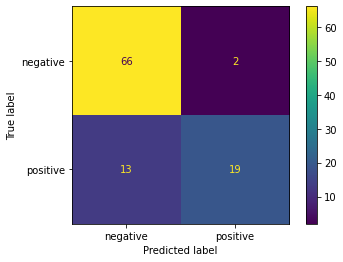

In [353]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T1_100_train, y_Sc3_T1_100_train_tfidf_Knei_predict)

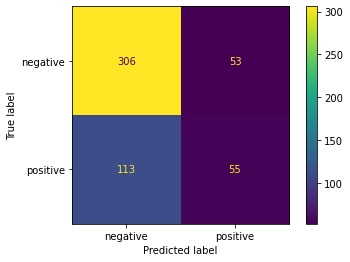

In [354]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Knei_predict)

In [355]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Knei_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Knei_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Knei_predict, pos_label = 'positive'))

Precision: 0.5092592592592593
Recall: 0.3273809523809524
F1: 0.39855072463768115


In [356]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Knei_predict, average = None))
print('Recall:', recall_score(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Knei_predict, average = None))
print('F1:', f1_score(y_Sc3_T1_100_test, y_Sc3_T1_100_test_tfidf_Knei_predict, average = None))

Precision: [0.73031026 0.50925926]
Recall: [0.85236769 0.32738095]
F1: [0.78663239 0.39855072]


In [357]:
# Scenario 3 - Tag correction 1 - Train size 100 - KNeighbors Classifier - TF-IDF - Analyzing Errors
Sc3_T1_100_error_tfidf_Knei_df = pd.concat(
    [ pd.concat([X_Sc3_T1_100_test, y_Sc3_T1_100_test], axis = 1).reset_index(),
    pd.Series(y_Sc3_T1_100_test_tfidf_Knei_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc3_T1_100_error_tfidf_Knei_df.drop('index', inplace = True, axis = 1)

In [358]:
Sc3_T1_100_error_tfidf_Knei_df.loc[Sc3_T1_100_error_tfidf_Knei_df['actual'] != Sc3_T1_100_error_tfidf_Knei_df['predicted']].shape

(166, 3)

In [359]:
Sc3_T1_100_error_tfidf_Knei_df.loc[Sc3_T1_100_error_tfidf_Knei_df['actual'] != Sc3_T1_100_error_tfidf_Knei_df['predicted']].to_csv('./data/Sc3_T1_100_error_tfidf_Knei_df.txt', sep ='\t')

In [360]:
Sc3_T1_100_error_tfidf_Knei_df.loc[Sc3_T1_100_error_tfidf_Knei_df['actual'] != Sc3_T1_100_error_tfidf_Knei_df['predicted']].head()

,full_text,actual,predicted
1,@ozuismysenpai Pillá https://t.co/fnZFeKA3fz,positive,negative
8,"Alertan que miles de jurados de votación están inhabilitados para estar en las elecciones a Presidente. La idoneidad de esos delincuentes no existe, toca inhabilitarlos y anular las mesas donde estuvieron y que se evidenció el fraude. ?@PGN_COL? https://t.co/UcAISdFd05",negative,positive
10,¡Viva Petro!\r\nColombia | Petro anuncia que si gana restablecerá las relaciones diplomáticas y consulares con Venezuela @InfoNodal https://t.co/VjYoQsWoY1,positive,negative
13,"@HELIODOPTERO @cataboc El propósito es que halla elecciones en una Colombia aterrorizada. No podemos caer nuevamente en la trampa, votemos bien. No podemos permitir que el innombrable siga gobernando. Nuestro país necesita un cambio urgente.",negative,positive
16,Eso sabe ;)\r\nAdelante #PetroPresidente2022 \r\nhttps://t.co/xscQ26b62m https://t.co/NIJNT0Sms7,positive,negative


## Scenario 3 - Tag correction 0 - Train size 300

In [361]:
# the randomstate number ensures that split are reproducible
X_Sc3_T0_300_train, X_Sc3_T0_300_test, y_Sc3_T0_300_train, y_Sc3_T0_300_test = train_test_split(neutral_positive_df['full_text'], neutral_positive_df['sentiment'], train_size = 300, stratify = neutral_positive_df['sentiment'], random_state = 1)

In [362]:
X_Sc3_T0_300_train.shape

(300,)

In [363]:
pd.Series(y_Sc3_T0_300_train).value_counts(normalize = True)

negative    0.666667
positive    0.333333
Name: sentiment, dtype: float64

In [364]:
X_Sc3_T0_300_test.shape

(327,)

In [365]:
pd.Series(y_Sc3_T0_300_test).value_counts(normalize = True)

negative    0.669725
positive    0.330275
Name: sentiment, dtype: float64

In [366]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [367]:
X_Sc3_T0_300_tfidf = tfidf.fit_transform(X_Sc3_T0_300_train)

### Scenario 3 - Tag correction 0 - Train size 300 - Random Forest Classifier

In [368]:
# Scenario 3 - Tag correction 0 - Train size 300 - Random Forest Classifier
X_Sc3_T0_300_tfidf_Ran_model = RandomForestClassifier()

In [369]:
X_Sc3_T0_300_tfidf_Ran_model.fit(X_Sc3_T0_300_tfidf, y_Sc3_T0_300_train)

RandomForestClassifier()

In [370]:
# Scenario 3 - Tag correction 0 - Train size 300 - Random Forest Classifier - tfidf
y_Sc3_T0_300_train_tfidf_Ran_predict = X_Sc3_T0_300_tfidf_Ran_model.predict(X_Sc3_T0_300_tfidf)
y_Sc3_T0_300_test_tfidf_Ran_predict = X_Sc3_T0_300_tfidf_Ran_model.predict(tfidf.transform(X_Sc3_T0_300_test))

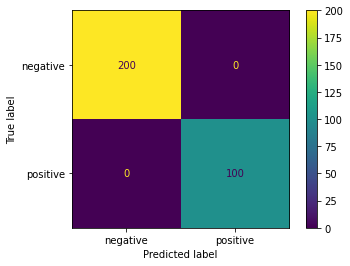

In [371]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T0_300_train, y_Sc3_T0_300_train_tfidf_Ran_predict)

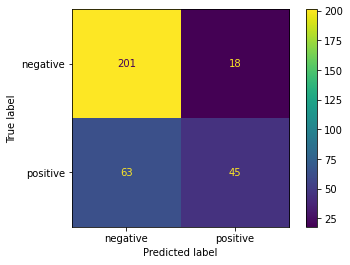

In [372]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Ran_predict)

In [373]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Ran_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Ran_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Ran_predict, pos_label = 'positive'))

Precision: 0.7142857142857143
Recall: 0.4166666666666667
F1: 0.5263157894736842


In [374]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Ran_predict, average = None))
print('Recall:', recall_score(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Ran_predict, average = None))
print('F1:', f1_score(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Ran_predict, average = None))

Precision: [0.76136364 0.71428571]
Recall: [0.91780822 0.41666667]
F1: [0.83229814 0.52631579]


In [375]:
# Scenario 3 - Tag correction 0 - Train size 300 - Random Forest Classifier - tfidf - Analyzing Errors
Sc3_T0_300_error_tfidf_Ran_df = pd.concat(
    [ pd.concat([X_Sc3_T0_300_test, y_Sc3_T0_300_test], axis = 1).reset_index(),
    pd.Series(y_Sc3_T0_300_test_tfidf_Ran_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc3_T0_300_error_tfidf_Ran_df.drop('index', inplace = True, axis = 1)

In [376]:
Sc3_T0_300_error_tfidf_Ran_df.loc[Sc3_T0_300_error_tfidf_Ran_df['actual'] != Sc3_T0_300_error_tfidf_Ran_df['predicted']].shape

(81, 3)

In [377]:
Sc3_T0_300_error_tfidf_Ran_df.loc[Sc3_T0_300_error_tfidf_Ran_df['actual'] != Sc3_T0_300_error_tfidf_Ran_df['predicted']].to_csv('./data/Sc3_T0_300_error_tfidf_Ran_df.txt', sep ='\t')

In [378]:
Sc3_T0_300_error_tfidf_Ran_df.loc[Sc3_T0_300_error_tfidf_Ran_df['actual'] != Sc3_T0_300_error_tfidf_Ran_df['predicted']].head()

,full_text,actual,predicted
2,@ozuismysenpai Pillá https://t.co/fnZFeKA3fz,positive,negative
4,"¿Por qué cree usted que debe ser suspendido Alexander Vega, Registrador Nacional del Estado Civil a 23 días de las elecciones presidenciales en Colombia? Responde el abogado constitucionalista ?? @Germancalderon1 en diálogo con @JeffersonNTN24 Directora @CGurisattiNTN24 ?? https://t.co/HpbMJ16s1T",positive,negative
8,"Con esta ley, que se intentó modificar varias veces en anteriores contiendas, la intención principal era asegurar que las campañas electorales se llevaran a cabo en condiciones igualitarias y transparentes.\r\n\r\n#Elecciones2022 #ColombiaDecide \r\nhttps://t.co/qRNy77hLm6",positive,negative
10,"#6May | El izquierdista Gustavo Petro, uno de los favoritos para las elecciones presidenciales de Colombia que se celebrarán a finales de mes, dijo que de resultar ganador, reanudará las relaciones con Venezuela, rotas desde el 23 de febrero de 2019. https://t.co/kwuU5ZjHa2",negative,positive
14,"LAS FARC se van de frente con #GustavoPetro. \r\nY decían que Juan Manuel Santos no había negociado el país con las FARC. Ahí están, a punto de quedarse con él. Tan linda que es Colombia pero si no la defendemos en estas elecciones la perderemos para siempre. https://t.co/ijkgDmdxiD",positive,negative


### Scenario 3 - Tag correction 0 - Train size 300 - KNeighbors Classifier

In [379]:
# Scenario 3 - Tag correction 0 - Train size 300 - KNeighbors Classifier
X_Sc3_T0_300_tfidf_Knei_model = KNeighborsClassifier(n_neighbors=3)

In [380]:
X_Sc3_T0_300_tfidf_Knei_model.fit(X_Sc3_T0_300_tfidf, y_Sc3_T0_300_train)

KNeighborsClassifier(n_neighbors=3)

In [381]:
# Scenario 3 - Tag correction 0 - Train size 300 - KNeighbors Classifier - tfidf
y_Sc3_T0_300_train_tfidf_Knei_predict = X_Sc3_T0_300_tfidf_Knei_model.predict(X_Sc3_T0_300_tfidf)
y_Sc3_T0_300_test_tfidf_Knei_predict = X_Sc3_T0_300_tfidf_Knei_model.predict(tfidf.transform(X_Sc3_T0_300_test))

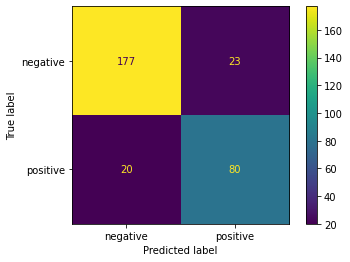

In [382]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T0_300_train, y_Sc3_T0_300_train_tfidf_Knei_predict)

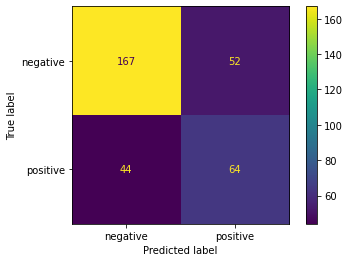

In [383]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Knei_predict)

In [384]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Knei_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Knei_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Knei_predict, pos_label = 'positive'))

Precision: 0.5517241379310345
Recall: 0.5925925925925926
F1: 0.5714285714285714


In [385]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Knei_predict, average = None))
print('Recall:', recall_score(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Knei_predict, average = None))
print('F1:', f1_score(y_Sc3_T0_300_test, y_Sc3_T0_300_test_tfidf_Knei_predict, average = None))

Precision: [0.79146919 0.55172414]
Recall: [0.76255708 0.59259259]
F1: [0.77674419 0.57142857]


In [386]:
# Scenario 3 - Tag correction 0 - Train size 300 - KNeighbors Classifier - tfidf - Analyzing Errors
Sc3_T0_300_error_tfidf_Knei_df = pd.concat(
    [ pd.concat([X_Sc3_T0_300_test, y_Sc3_T0_300_test], axis = 1).reset_index(),
    pd.Series(y_Sc3_T0_300_test_tfidf_Knei_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc3_T0_300_error_tfidf_Knei_df.drop('index', inplace = True, axis = 1)

In [387]:
Sc3_T0_300_error_tfidf_Knei_df.loc[Sc3_T0_300_error_tfidf_Knei_df['actual'] != Sc3_T0_300_error_tfidf_Knei_df['predicted']].shape

(96, 3)

In [388]:
Sc3_T0_300_error_tfidf_Knei_df.loc[Sc3_T0_300_error_tfidf_Knei_df['actual'] != Sc3_T0_300_error_tfidf_Knei_df['predicted']].to_csv('./data/Sc3_T0_300_error_tfidf_Knei_df.txt', sep ='\t')

In [389]:
Sc3_T0_300_error_tfidf_Knei_df.loc[Sc3_T0_300_error_tfidf_Knei_df['actual'] != Sc3_T0_300_error_tfidf_Knei_df['predicted']].head()

,full_text,actual,predicted
2,@ozuismysenpai Pillá https://t.co/fnZFeKA3fz,positive,negative
3,"@MariaFdaCabal Fuera ""Indra"" de Colombia ???? ha participado en el desarrollo de elecciones en Noruega, Francia, Eslovenia, Portugal, Italia, Estados Unidos, Argentina,Bolivia Angola,Argentina, Colombia entre otros, ofreciendo todo tipo de servicios electorales pero a favor de la izquierda ??",negative,positive
6,"@NHolhuin @alezandrazam72 Modelo de Tutela que busca dar ""Tranquilidad"" Para las Elecciones Presidenciales del #29Mayo 2022 en #Colombia \r\nhttps://t.co/DRb5uWlUa3",positive,negative
7,"A caso en Colombia hay Procuraduría? O si existe está sin cabeza? Las elecciones al Congreso fueron un fraude, hay que anularlas y repetirlas; hay que cerrar el CNE y sacar a todos en la Registraduría, la mayoría para una CARCEL https://t.co/wSfZAJfJcX",negative,positive
8,"Con esta ley, que se intentó modificar varias veces en anteriores contiendas, la intención principal era asegurar que las campañas electorales se llevaran a cabo en condiciones igualitarias y transparentes.\r\n\r\n#Elecciones2022 #ColombiaDecide \r\nhttps://t.co/qRNy77hLm6",positive,negative


## Scenario 3 - Tag correction 1 - Train size 300

### Scenario 3 - Tag correction 1 - Train size 300 - Random Forest Classifier

In [390]:
Sc3_T1_300_tfidf_Ran_df = pd.read_csv('./data/Sc3_T1_300_tfidf_Ran_df.txt', sep = '\t')

In [391]:
Sc3_T1_300_tfidf_Ran_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.681021
positive    0.318979
Name: sentiment, dtype: float64

In [392]:
Sc3_T1_300_tfidf_Ran_df.head()

,id,full_text,sentiment,emotion
0,1,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,2,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\r\nUribe Velez Alvarito no los deja dormir\r\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,3,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,4,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,negative,joy
4,5,"#OtraPregunta \r\n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\r\nEsto no pinta nada bien... y si además gana Lula en Brasil...\r\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [393]:
# the randomstate number ensures that split are reproducible
X_Sc3_T1_300_train, X_Sc3_T1_300_test, y_Sc3_T1_300_train, y_Sc3_T1_300_test = train_test_split(Sc3_T1_300_tfidf_Ran_df['full_text'], Sc3_T1_300_tfidf_Ran_df['sentiment'], train_size = 300, stratify = Sc3_T1_300_tfidf_Ran_df['sentiment'], random_state = 1)

In [394]:
X_Sc3_T1_300_train.shape

(300,)

In [395]:
pd.Series(y_Sc3_T1_300_train).value_counts(normalize = True)

negative    0.68
positive    0.32
Name: sentiment, dtype: float64

In [396]:
X_Sc3_T1_300_test.shape

(327,)

In [397]:
pd.Series(y_Sc3_T1_300_test).value_counts(normalize = True)

negative    0.681957
positive    0.318043
Name: sentiment, dtype: float64

In [398]:
X_Sc3_T1_300_tfidf = tfidf.fit_transform(X_Sc3_T1_300_train)

In [399]:
# Scenario 3 - Tag correction 0 - Train size 300 - Random Forest Classifier
X_Sc3_T1_300_tfidf_Ran_model = RandomForestClassifier()

In [400]:
X_Sc3_T1_300_tfidf_Ran_model.fit(X_Sc3_T1_300_tfidf, y_Sc3_T1_300_train)

RandomForestClassifier()

In [401]:
# Scenario 3 - Tag correction 0 - Train size 300 - Random Forest Classifier - TF-IDF
y_Sc3_T1_300_train_tfidf_Ran_predict = X_Sc3_T1_300_tfidf_Ran_model.predict(X_Sc3_T1_300_tfidf)
y_Sc3_T1_300_test_tfidf_Ran_predict = X_Sc3_T1_300_tfidf_Ran_model.predict(tfidf.transform(X_Sc3_T1_300_test))

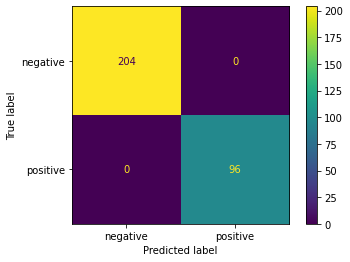

In [402]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T1_300_train, y_Sc3_T1_300_train_tfidf_Ran_predict)

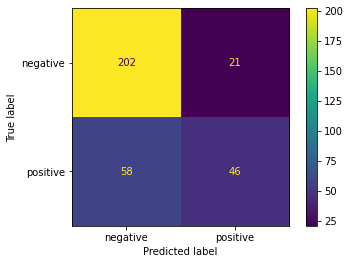

In [403]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Ran_predict)

In [404]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Ran_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Ran_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Ran_predict, pos_label = 'positive'))

Precision: 0.6865671641791045
Recall: 0.4423076923076923
F1: 0.5380116959064327


In [405]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Ran_predict, average = None))
print('Recall:', recall_score(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Ran_predict, average = None))
print('F1:', f1_score(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Ran_predict, average = None))

Precision: [0.77692308 0.68656716]
Recall: [0.9058296  0.44230769]
F1: [0.83643892 0.5380117 ]


In [406]:
# Scenario 3 - Tag correction 0 - Train size 300 - Random Forest Classifier - TF-IDF - Analyzing Errors
Sc3_T1_300_error_tfidf_Ran_df = pd.concat(
    [ pd.concat([X_Sc3_T1_300_test, y_Sc3_T1_300_test], axis = 1).reset_index(),
    pd.Series(y_Sc3_T1_300_test_tfidf_Ran_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc3_T1_300_error_tfidf_Ran_df.drop('index', inplace = True, axis = 1)

In [407]:
Sc3_T1_300_error_tfidf_Ran_df.loc[Sc3_T1_300_error_tfidf_Ran_df['actual'] != Sc3_T1_300_error_tfidf_Ran_df['predicted']].shape

(79, 3)

In [408]:
Sc3_T1_300_error_tfidf_Ran_df.loc[Sc3_T1_300_error_tfidf_Ran_df['actual'] != Sc3_T1_300_error_tfidf_Ran_df['predicted']].to_csv('./data/Sc3_T1_300_error_tfidf_Ran_df.txt', sep ='\t')

In [409]:
Sc3_T1_300_error_tfidf_Ran_df.loc[Sc3_T1_300_error_tfidf_Ran_df['actual'] != Sc3_T1_300_error_tfidf_Ran_df['predicted']].head()

,full_text,actual,predicted
0,Marbelle amenaza con irse de Colombia si Petro gana las elecciones ??????\r\n\r\nLa caleña tiene decidido abandonar el país si el candidato del Pacto Histórico gana su lugar en la Casa de Nariño por los próximos cuatro años. #tuvozpereira https://t.co/GHdCZ9AJZA,positive,negative
6,@Nata_Salud @Sandrag69 @AndresMejiaV ¡Hola Natalia! Te invitamos a descubrir tu #MatchPresidencial aquí: https://t.co/0E1tZKypTK,positive,negative
8,"El Tribunal Administrativo de Cundinamarca negó la solicitud de suspensión provisional del Registrador Nacional, Alexander Vega. Sin embargo, decretó unas medidas cautelares para garantizar las elecciones. | A 23 días para la elección presidencial en Colombia, opine. https://t.co/KNA8oitIEa",positive,negative
9,"El comunista @petrogustavo se quitó la careta este viernes y dijo que si gana las elecciones del #29Mayo en #Colombia reconocerá y trabajará diplomáticamente con el dictador @NicolasMaduro\r\n\r\n#Colombianos, no permitan que llegue el #Comunismo en su país.\r\n\r\nVoten por @FicoGutierrez https://t.co/IDWS9UoyaG",positive,negative
10,Gastón Garriga: cómo multiplicar algunas ideas de CFK/Colombia avanza hacia elecciones con Petro amenazado/Interacción con oyentes.,positive,negative


### Scenario 3 - Tag correction 1 - Train size 300 - KNeighbors Classifier

In [410]:
Sc3_T1_300_tfidf_Knei_df = pd.read_csv('./data/Sc3_T1_300_tfidf_Knei_df.txt', sep = '\t')

In [411]:
Sc3_T1_300_tfidf_Knei_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.681021
positive    0.318979
Name: sentiment, dtype: float64

In [412]:
Sc3_T1_300_tfidf_Knei_df.head()

,id,full_text,sentiment,emotion
0,1,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,2,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\r\nUribe Velez Alvarito no los deja dormir\r\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,3,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,4,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,negative,joy
4,5,"#OtraPregunta \r\n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\r\nEsto no pinta nada bien... y si además gana Lula en Brasil...\r\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [413]:
# the randomstate number ensures that split are reproducible
X_Sc3_T1_300_train, X_Sc3_T1_300_test, y_Sc3_T1_300_train, y_Sc3_T1_300_test = train_test_split(Sc3_T1_300_tfidf_Knei_df['full_text'], Sc3_T1_300_tfidf_Knei_df['sentiment'], train_size = 300, stratify = Sc3_T1_300_tfidf_Knei_df['sentiment'], random_state = 1)

In [414]:
X_Sc3_T1_300_train.shape

(300,)

In [415]:
pd.Series(y_Sc3_T1_300_train).value_counts(normalize = True)

negative    0.68
positive    0.32
Name: sentiment, dtype: float64

In [416]:
X_Sc3_T1_300_test.shape

(327,)

In [417]:
pd.Series(y_Sc3_T1_300_test).value_counts(normalize = True)

negative    0.681957
positive    0.318043
Name: sentiment, dtype: float64

In [418]:
X_Sc3_T1_300_tfidf = tfidf.fit_transform(X_Sc3_T1_300_train)

In [419]:
# Scenario 3 - Tag correction 1 - Train size 300 - KNeighbors Classifier
X_Sc3_T1_300_tfidf_Knei_model = KNeighborsClassifier(n_neighbors=3)

In [420]:
X_Sc3_T1_300_tfidf_Knei_model.fit(X_Sc3_T1_300_tfidf, y_Sc3_T1_300_train)

KNeighborsClassifier(n_neighbors=3)

In [421]:
# Scenario 3 - Tag correction 1 - Train size 300 - KNeighbors Classifier - TF-IDF
y_Sc3_T1_300_train_tfidf_Knei_predict = X_Sc3_T1_300_tfidf_Knei_model.predict(X_Sc3_T1_300_tfidf)
y_Sc3_T1_300_test_tfidf_Knei_predict = X_Sc3_T1_300_tfidf_Knei_model.predict(tfidf.transform(X_Sc3_T1_300_test))

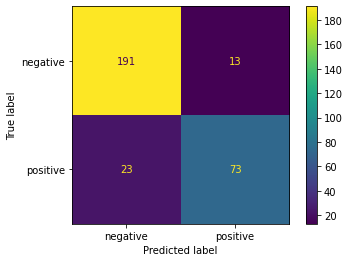

In [422]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T1_300_train, y_Sc3_T1_300_train_tfidf_Knei_predict)

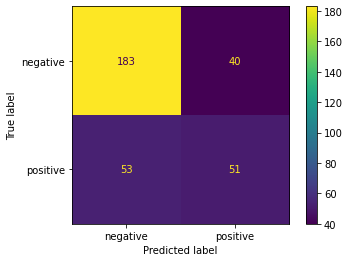

In [423]:
ConfusionMatrixDisplay.from_predictions(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Knei_predict)

In [424]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Knei_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Knei_predict, pos_label = 'positive'))
print('F1:', f1_score(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Knei_predict, pos_label = 'positive'))

Precision: 0.5604395604395604
Recall: 0.49038461538461536
F1: 0.523076923076923


In [425]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Knei_predict, average = None))
print('Recall:', recall_score(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Knei_predict, average = None))
print('F1:', f1_score(y_Sc3_T1_300_test, y_Sc3_T1_300_test_tfidf_Knei_predict, average = None))

Precision: [0.77542373 0.56043956]
Recall: [0.8206278  0.49038462]
F1: [0.79738562 0.52307692]


In [426]:
# Scenario 3 - Tag correction 1 - Train size 300 - KNeighbors Classifier - TF-IDF - Analyzing Errors
Sc3_T1_300_error_tfidf_Knei_df = pd.concat(
    [ pd.concat([X_Sc3_T1_300_test, y_Sc3_T1_300_test], axis = 1).reset_index(),
    pd.Series(y_Sc3_T1_300_test_tfidf_Knei_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

Sc3_T1_300_error_tfidf_Knei_df.drop('index', inplace = True, axis = 1)

In [427]:
Sc3_T1_300_error_tfidf_Knei_df.loc[Sc3_T1_300_error_tfidf_Knei_df['actual'] != Sc3_T1_300_error_tfidf_Knei_df['predicted']].shape

(93, 3)

In [428]:
Sc3_T1_300_error_tfidf_Knei_df.loc[Sc3_T1_300_error_tfidf_Knei_df['actual'] != Sc3_T1_300_error_tfidf_Knei_df['predicted']].to_csv('./data/Sc3_T1_300_error_tfidf_Knei_df.txt', sep ='\t')

In [429]:
Sc3_T1_300_error_tfidf_Knei_df.loc[Sc3_T1_300_error_tfidf_Knei_df['actual'] != Sc3_T1_300_error_tfidf_Knei_df['predicted']].head()

,full_text,actual,predicted
0,Marbelle amenaza con irse de Colombia si Petro gana las elecciones ??????\r\n\r\nLa caleña tiene decidido abandonar el país si el candidato del Pacto Histórico gana su lugar en la Casa de Nariño por los próximos cuatro años. #tuvozpereira https://t.co/GHdCZ9AJZA,positive,negative
9,"El comunista @petrogustavo se quitó la careta este viernes y dijo que si gana las elecciones del #29Mayo en #Colombia reconocerá y trabajará diplomáticamente con el dictador @NicolasMaduro\r\n\r\n#Colombianos, no permitan que llegue el #Comunismo en su país.\r\n\r\nVoten por @FicoGutierrez https://t.co/IDWS9UoyaG",positive,negative
10,Gastón Garriga: cómo multiplicar algunas ideas de CFK/Colombia avanza hacia elecciones con Petro amenazado/Interacción con oyentes.,positive,negative
11,"Colombia depende de renuncia/destitución de Alexander Vega de @Registraduria, y de auditoría imparcial que contrate @CNE_COLOMBIA (que lo dudo), fraude ocurrido en pasadas elecciones es de registrarlo en historia de Colombia, estas 2 instituciones dejan mucho que pensar.",negative,positive
13,El candidato presidencial @ingrodolfohdez dice que buscará llegar al poder “sin comprar votos con plata robada del pueblo colombiano”. ¿#ASonDeQué quiere ser presidente? \r\n\r\nhttps://t.co/9kDluOHG00\r\n\r\n#Elecciones2022 #ColombiaDecide https://t.co/HembUIeVXb,negative,positive
